# Final Project - Loans Dataset

Welcome to the final step on the Exploratory Data Analysis (EDA) module. Congratulations! This is the final project!


## Instructions

The objective of this project is to explore and solve problems on a Loans Dataset (`final_project_lending.csv`). This dataset contains information about credit applicants. Banks use this kind of datasets to create models to help on deciding on who to accept/refuse for a loan. Generally, after cleaning and organizing the dataset, the patterns of a good / bad applicant are learned by machine learning models.

Explore, test, evaluate, think, be sceptic! This is Data Science!


## Details on the dataset

The Target (Label) name is `bad_loan`, where $1$ means the observation is a default (person that ended up not paying the loan), and $0$ means the observation is a non-default (person that ended up paying the loan).

All the other features are characteristics of the applicant. 


## Delivery of Project

This jupyter notebook is to be delivered to evaluate your knowledge on the Exploratory Data Analysis module at Rumos, **before the FINAL DATE (end of day 16-02-2025)** agreed with the professor. Please add your name and e-mail next.

**Student Name**: Nuno Pereira  
**E-mail**: pereiranuno88@gmail.com


## Plagiarism

Always remember that you are here to learn. Discussions on the final project are highly incentivised but please do not share your work. The struggle to solve the problems is needed in order to become a true Data Scientist. By allowing others to use your code you are making the world a worse place: you are not truly helping your colleague, and you are not promoting discussions on the topic.

In case you need help, or just want to discuss some project-related topics, reach out to me either through email or through a Slack direct message.

In [3093]:
# NOTE: You can import any library you might find useful besides the following ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.patches as mpatches
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #For Cross Validation
from sklearn.metrics import roc_auc_score #For Model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

In [3094]:
# RUN this cell: load the dataset (do NOT delete this cell)
data = pd.read_csv('final_project_lending.csv', low_memory=False)

# Objectives

Please solve the following exercises by creating a markdown cell with **# EXERCISE >>NUMBER<<**  just before you solve it (you can use the number of cells you need after that).

1. Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

2. **Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class! Visualize the data as much as needed to truly understand the data. You should, at the least do the following (but do visualize more than these, as that knowledge will help you on the next tasks):

    2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.  
    2.2. Create a **bar plot** from the data that you think is relevant. Explain.  
    2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  
    2.4. Create a **distribution plot** with a feature broken down by target. Don't forget to add some alpha.  
    2.5. (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  

3. Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`. -> revise these.

4. Correlation.

    4.1. What are the two most correlated numerical features (Spearman) - absolute number?  
    4.2. What is the numerical feature most correlated with the target (Pearson)?  

5. Are there any **outliers**? If there are, solve them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

6. Deal with the **missing values**, along with anomalies. Detect and eliminate them. Remember: not all missing values are represented by a `np.nan`.

7. **Feature Selection**. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical.)

8. **Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

    8.1. Create a pipeline with three steps: (1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; (2) One Scaler you may know; (3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
    8.2. Fit and Transform your dataset.  
    8.3. Comment what you obtained.  

9. Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.


## Evaluation
Points (of a total of 100%):
1. 5%  
2. 20%  
3. 10%  
4. 10%  
5. 10%  
6. 10%  
7. 10%  
8. 10% 
9. 5%

Final 10% for additional effort and conclusions beyond what was asked (give your _extra mile_).

## Important notes
1. Data Science is all about *flow*. Keep your analysis work-flow consistent.  
2. When it is requested you to *describe* something, please be 1. sceptic, 2. objective, and 3. succinct! 
3. If you don't know: search, invent, study, but please don't leave any exercise blank.

### Good luck!
# 3, 2, 1, GO! GO! GO!

---

---

# EXERCISE 1

---

Obter as dimensões do DataFrame e apresentar o número de linhas (observações) e colunas (variáveis)

In [3095]:
data.shape

(20000, 15)

 Obter algumas estatísticas descritivas do DataFrame

In [3096]:
data.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


Consultar tipos de dados das variaveis como também contagem de valore não nulos.

In [3097]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

Apresentar aleatóriamente 10 registos para analisar formato de dados. 

In [3098]:
data.sample(100)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
11757,9145014,B,70000.0,0,11,RENT,14.35,debt_consolidation,36 months,0,NaN,62.8,0.0,0.020471,0
7094,7691501,G,60000.0,0,9,RENT,12.98,debt_consolidation,60 months,1,NaN,54.1,0.0,0.893959,0
12381,9445235,C,72000.0,0,8,MORTGAGE,13.20,debt_consolidation,36 months,0,NaN,81.1,0.0,0.658847,0
15224,5855937,A,212000.0,0,8,MORTGAGE,20.89,debt_consolidation,36 months,1,NaN,68.5,0.0,0.601991,0
12521,9275111,E,80000.0,0,5,MORTGAGE,13.85,debt_consolidation,60 months,0,NaN,72.1,0.0,0.571431,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,8117403,D,35000.0,1,1,RENT,9.22,debt_consolidation,36 months,0,NaN,78.4,0.0,0.884102,0
6238,7685801,D,41000.0,0,11,MORTGAGE,3.66,credit_card,36 months,1,NaN,48.2,0.0,0.839940,0
6186,7685410,D,60389.0,0,11,MORTGAGE,3.95,debt_consolidation,36 months,1,NaN,31.8,0.0,0.314079,0
2560,10082709,C,50000.0,0,11,MORTGAGE,18.97,debt_consolidation,60 months,1,NaN,26.9,0.0,0.306413,0


Apresentar nº de valore nulos por variavel

In [3099]:
data.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

Calcular proporção de empréstimos que entraram em incumprimento (bad_loan equal to 1)

In [3100]:
bad_loan_percentage = (data['bad_loan'].sum() / len(data)) * 100
print(f"Percentagem de empréstimos que entraram em incumprimento: {bad_loan_percentage:.2f}%")

Percentagem de empréstimos que entraram em incumprimento: 20.00%


O conjunto de dados contém informações sobre empréstimos de crédito, é constituido por 20 mil registos e 13 variáveis, excluindo o identificador (id) e target (bad_loan). Algumas variáveis apresentam valores em falta, destacando-se "home_ownership" e "last_major_derog_none". A taxa de incumprimento dos créditos (Target) pode ser observada através da coluna "bad_loan", onde se verifica que 20% dos processos de crédito resultaram em incumprimento. 


# EXERCISE 2

---

### EXERCISE 2.1

---

O código abaixo utiliza a função `pairplot` da biblioteca `seaborn` para criar um gráfico de dispersão entre todas as combinações de variáveis numéricas do conjunto de dados `data`. Para uma análise geral e identificação de possiveis padrões.

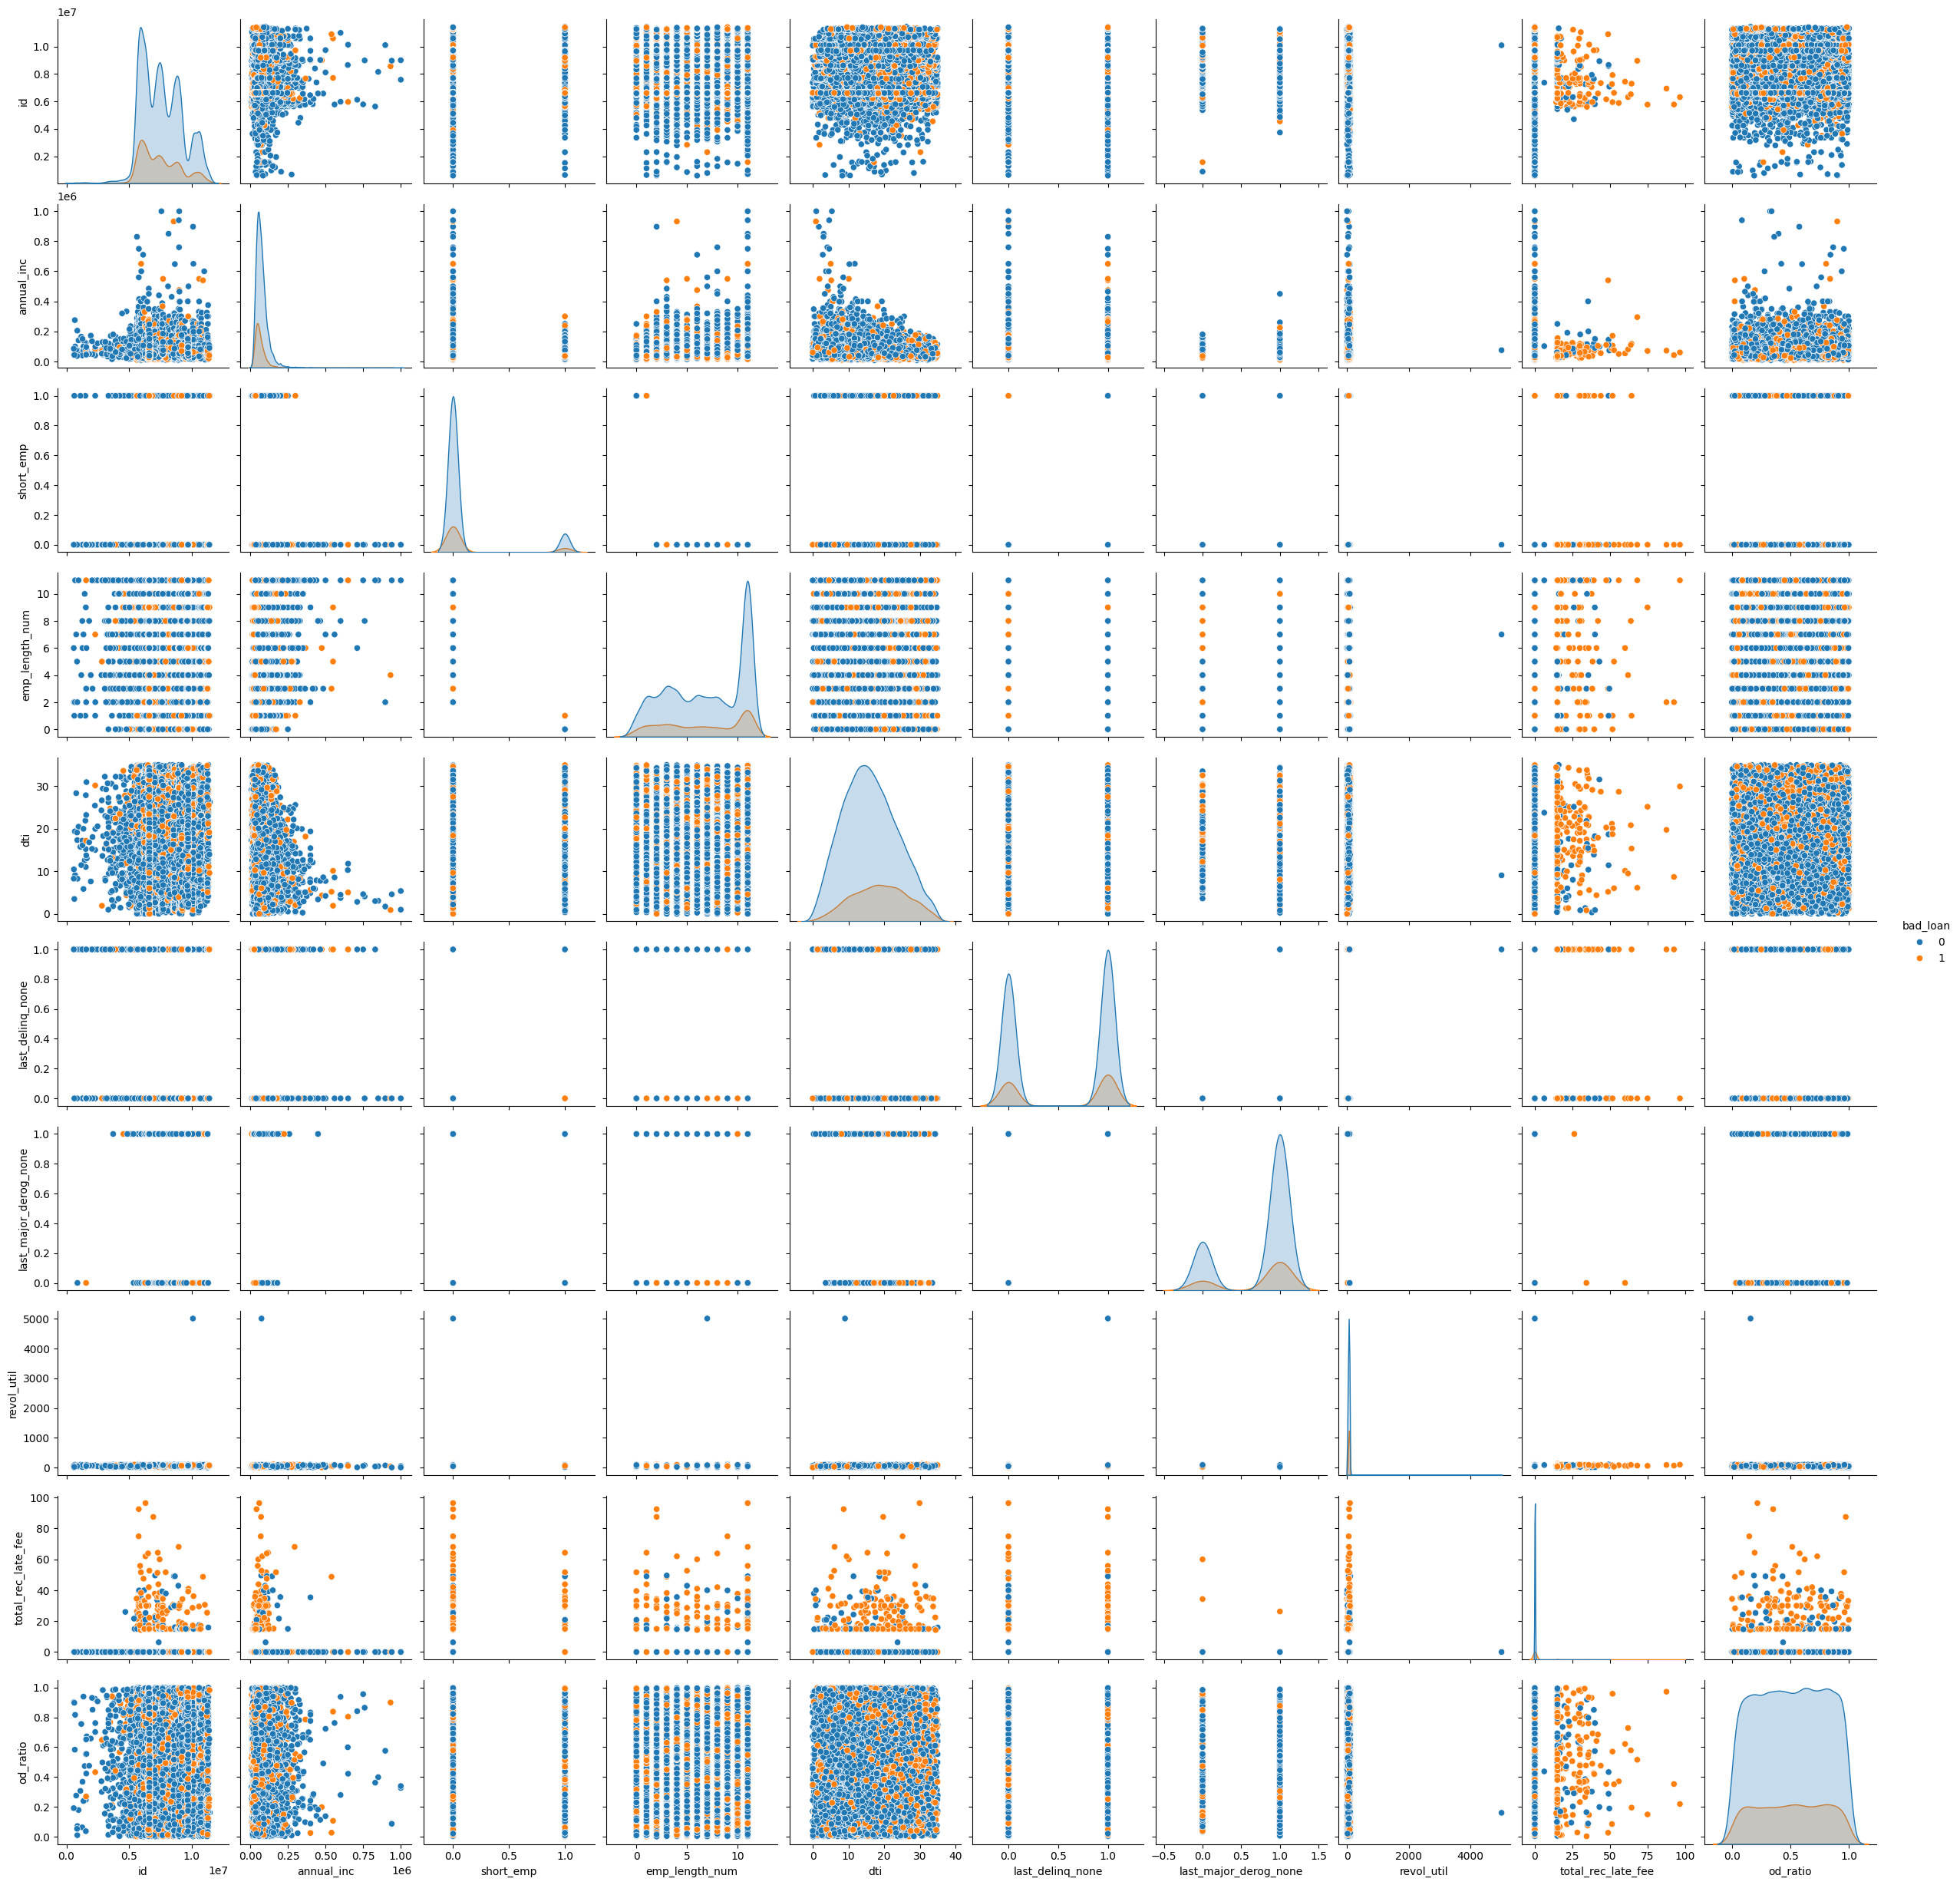

In [3101]:
sns.pairplot(data,hue='bad_loan')
plt.show()

Construção de Gráfico de Dispersão entre Rendimento Anual e Rácio Dívida/Rendimento.

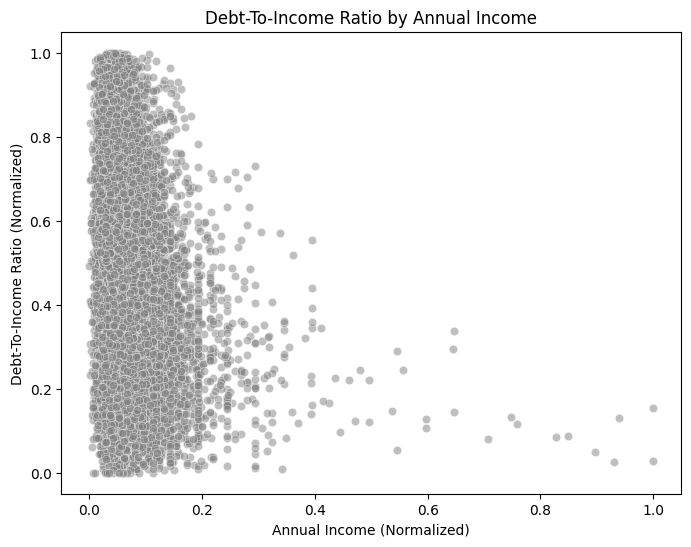

In [3102]:
# Definir as variáveis de interesse
selected_vars = ["annual_inc", "dti"]

# Aplicar Min-Max Scaling para normalização das variaveis em novo dataframe
scaler = MinMaxScaler()
df_scaled = data.copy()
df_scaled[selected_vars] = scaler.fit_transform(data[selected_vars])

# Criar scatterplot com variáveis normalizadas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["annual_inc"], y=df_scaled["dti"], alpha=0.5, color='gray')
plt.xlabel("Annual Income (Normalized)")
plt.ylabel("Debt-To-Income Ratio (Normalized)")
plt.title("Debt-To-Income Ratio by Annual Income")
plt.show()

O gráfico de dispersão entre rendimento anual (annual_inc) e rácio dívida/rendimento (dti) ilustra a relação entre o rácio de endividamento/ rendimento e o rendimento dos indivíduos analisados. Apesar da dispersão dos dados, observa-se um padrão geral: à medida que o rendimento anual aumenta, o DTI tende a diminuir, o que sugere que, em média, indivíduos com rendimentos mais elevados possuem uma menor proporção de dívida face aos seus rendimentos.

No entanto, existem casos de indivíduos com rendimentos mais elevados que apresentam um DTI superior a outros com rendimentos inferiores. Isto indica que um rendimento mais alto não implica necessariamente um menor risco de crédito, uma vez que alguns indivíduos têm  elevados níveis de endividamento, independentemente dos seus ganhos. Assim, a variável Rendimento Anual, por si só, pode não ser suficiente para prever  o risco de incumprimento de um empréstimo, sendo necessário considerar outras variaveis com a DTI para uma avaliação mais completa.

### EXERCISE 2.2

---

Este código cria um gráfico de barras para representar a **média do Debt-to-Income Ratio (DTI) por Grade de Crédito**, utilizando um esquema de cores que varia do **verde (baixo risco) ao vermelho (alto risco)**.

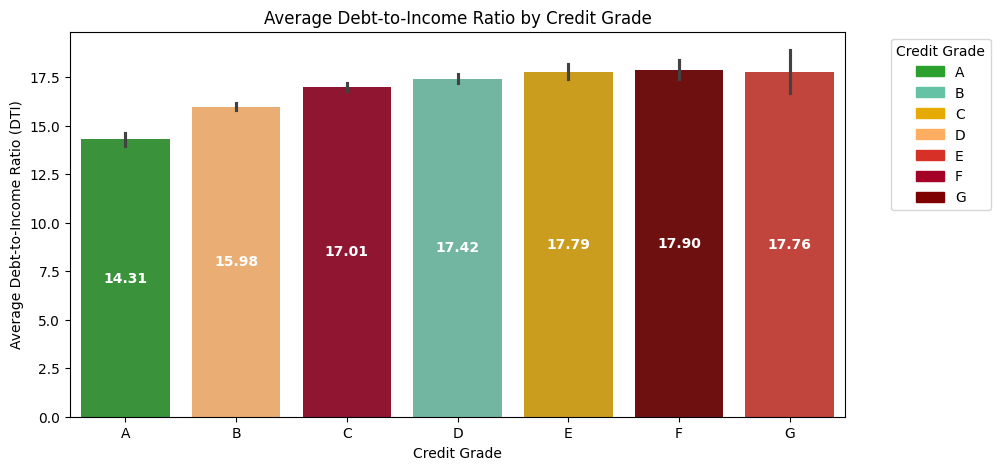

In [3103]:
# Definir a ordem correta das grades
grades_ordered = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Definir cores da paleta verde → vermelho para as grades
grade_colors = {
    "A": "#2ca02c",  # Verde (baixo risco) 
    "B": "#66c2a5",  # Verde claro
    "C": "#e6ab02",  # Amarelo
    "D": "#fdae61",  # Laranja
    "E": "#d73027",  # Vermelho
    "F": "#a50026",  # Vermelho escuro
    "G": "#7f0000"   # Vermelho mais intenso
}

# Criar o gráfico de barras para o DTI médio por Grade
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x=data["grade"],
    y=data["dti"],
    hue=data["grade"], 
    order=grades_ordered,
    palette=[grade_colors[g] for g in grades_ordered],  # Aplicar gradiente de cores personalizado
    dodge=False  # Evitar deslocamento das barras
)

# Adicionar valores dentro das barras, centralizados verticalmente e em branco
dti_means = data.groupby("grade")["dti"].mean().reindex(grades_ordered)
for i, (grade, value) in enumerate(dti_means.items()):
    plt.text(i, value / 2, f"{value:.2f}", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Adicionar rótulos e título 
plt.xlabel("Credit Grade")
plt.ylabel("Average Debt-to-Income Ratio (DTI)")
plt.title("Average Debt-to-Income Ratio by Credit Grade")

# Criar legendas personalizadas
legend_patches = [mpatches.Patch(color=grade_colors[grade], label=f"{grade}") for grade in grades_ordered]
plt.legend(handles=legend_patches, title="Credit Grade", bbox_to_anchor=(1.05, 1), loc="upper left")

# Exibir o gráfico
plt.show()



O gráfico apresenta a média do Rácio Dívida/Rendimento (DTI) por classificação de risco de crédito (Grade), utilizando uma escala de cores que varia do verde (menor risco - Grade A) ao vermelho (maior risco - Grade G). De forma geral, observa-se que, à medida que a classificação de crédito piora (de A para G), a média do DTI aumenta, indicando que os empréstimos com classificações mais baixas refletem uma maior dificuldade no cumprimento das obrigações financeiras.

As barras de erro representam a variabilidade dos valores de DTI dentro de cada grade, ajudando a compreender as diferenças na dispersão dos dados. Na maior parte das classificações, as barras de erro mantêm-se relativamente consistentes, mas destaca-se a Grade G, onde a barra de erro é significativamente maior. Esse fenómeno pode ser explicado pelo menor número de observações disponíveis para essa categoria, tornando a estimativa da média também  menos precisa e também poderá explicar um melhoramento minimo de DTI da classificação F para G.

Apesar dessa pequena variação contra o padrão geral confirma-se: à medida que a classificação de crédito se deteriora, a média do DTI tende a aumentar, refletindo um maior comprometimento financeiro dos emprestimos.

### EXERCISE 2.3

---

O código abaixo vai criar dois heatmaps com diferentes correlações nomeadamente pearson e spearman.

In [3104]:
#Selecionar as variáveis numéricas, excluir identificador do empréstimo
numeric_df = data.select_dtypes(include=['number'])
numeric_df.drop(columns=['id'], inplace=True)

#Calculate the Pearson correlation
corr_pearson = numeric_df.corr(method='pearson',numeric_only=True)
#Calculate the Spearman correlation
corr_spearman = numeric_df.corr(method='spearman',numeric_only=True)

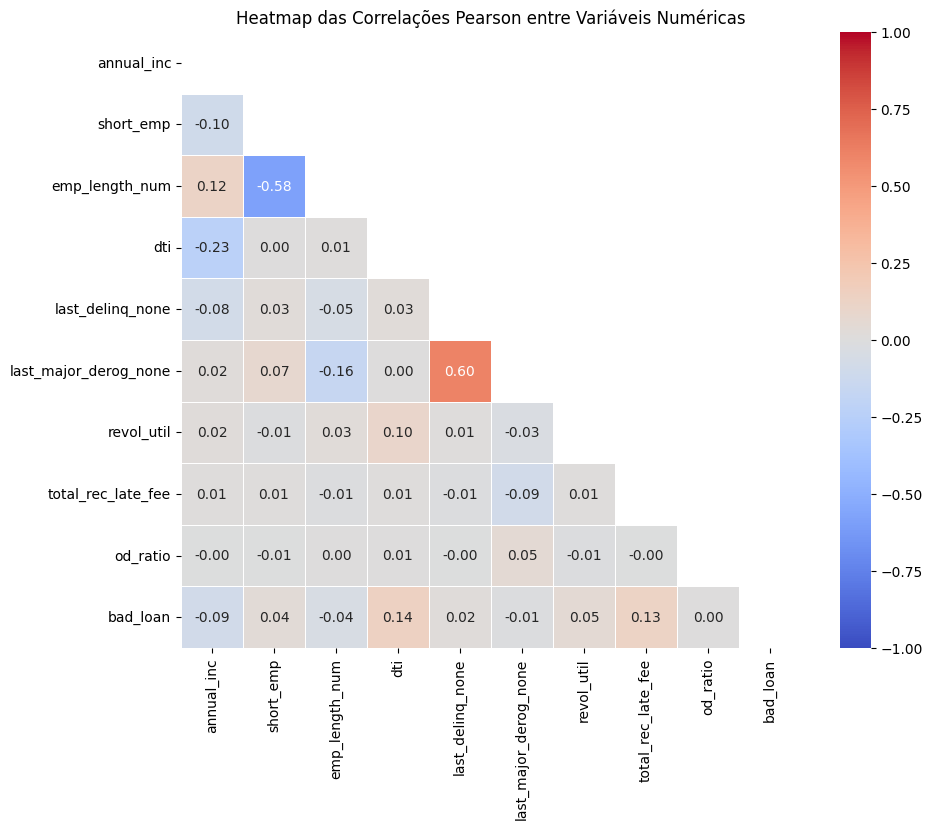

In [3105]:
# Criar um heatmap Person das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_pearson))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,mask=mask,vmin=-1,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Pearson entre Variáveis Numéricas", color="black")

# Exibir o gráfico
plt.show()


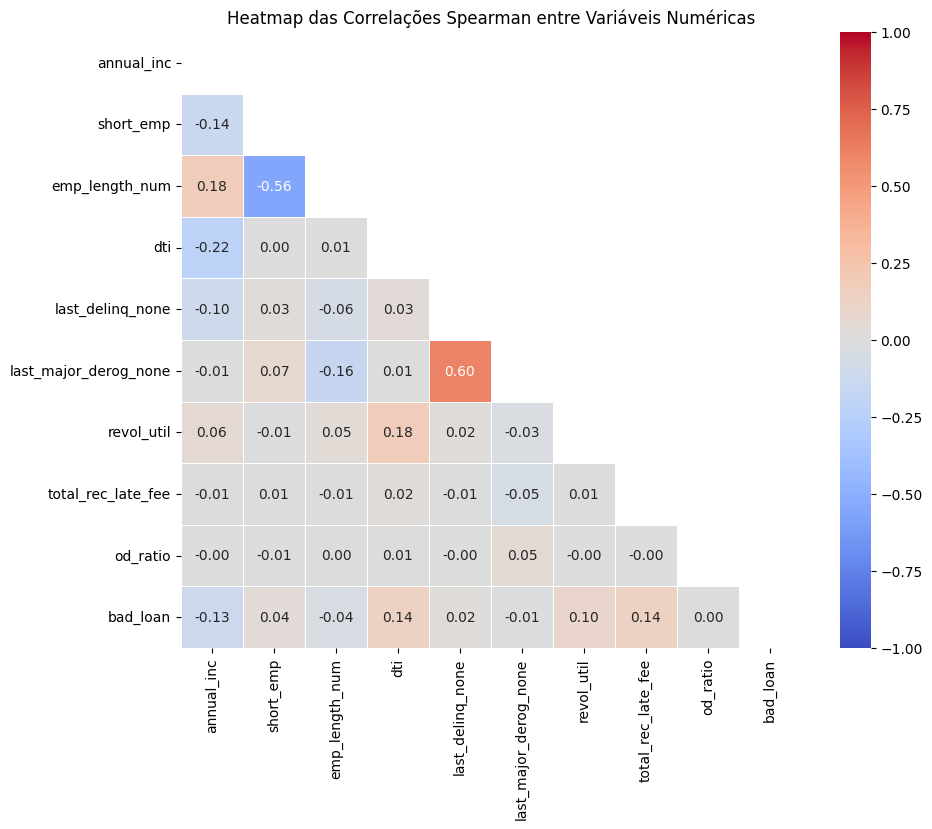

In [3106]:
# Criar um heatmap Spearmn das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_spearman))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,mask=mask,vmin=-1,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Spearman entre Variáveis Numéricas", color="black")

# Exibir o gráfico
plt.show()


In [3107]:
def calc_correlation(data, var1, var2):
    """
    Calcula a correlação de Pearson e Spearman entre duas variáveis,
    removendo valores nulos antes do cálculo.
    
    Parâmetros:
    - data: DataFrame dados
    - var1: Nome da primeira variável
    - var2: Nome da segunda variável
    
    Retorna:
    - dicionário contendo os valores das correlações e p-values
    """
    # Remover valores nulos
    df_clean_corr = data.dropna(subset=[var1, var2])
    
    # Calcular a correlação de Pearson
    pearson_corr, pearson_p = scipy.stats.pearsonr(df_clean_corr[var1], df_clean_corr[var2])
    
    # Calcular a correlação de Spearman
    spearman_corr, spearman_p = scipy.stats.spearmanr(df_clean_corr[var1], df_clean_corr[var2])
    
    # Retornar os resultados
    return {
        "pearson_corr": pearson_corr,
        "pearson_p_value": pearson_p,
        "spearman_corr": spearman_corr,
        "spearman_p_value": spearman_p
    }


Calcular a correlação entre variavies 'last_delinq_none', 'last_major_derog_none'

In [3108]:

result_corr = calc_correlation(data, 'last_delinq_none', 'last_major_derog_none')
print(result_corr)

{'pearson_corr': np.float64(0.6032673979655274), 'pearson_p_value': np.float64(3.494069707607259e-58), 'spearman_corr': np.float64(0.6032673979655275), 'spearman_p_value': np.float64(3.494069707606952e-58)}


Calcular a correlação entre variaveis 'annual_inc', 'dti'

In [3109]:
result_corr = calc_correlation(data, 'annual_inc', 'dti')
print(result_corr)

{'pearson_corr': np.float64(-0.2302187367113181), 'pearson_p_value': np.float64(5.395690963323319e-237), 'spearman_corr': np.float64(-0.2234259264191358), 'spearman_p_value': np.float64(5.5451847596024445e-223)}


O heatmap acima apresenta as correlações entre variáveis numéricas, utilizando tons azul, cinza a vermelho para facilitar a visualização das relações mais fortes, onde as cores mais fortes nas tonalidades vermelhas e azul indicam correlações mais elevadas e as mais claras representam correlações mais fracas. Observa-se uma correlação significativa entre last_delinq_none e last_major_derog_none (0,60), o que sugere que quem já teve uma delinquência recente tem maior probabilidade de ter registado uma classificação de risco grave com 90 ou mais dias de atraso.

Além disso, verifica-se uma correlação negativa entre annual_inc e dti (-0,23), indicando que, quanto maior o rendimento, menor o peso da dívida sobre este, o que sugere que pessoas com rendimentos mais elevados tendem a apresentar um nível de endividamento inferior. Para ambos os valores de correlação referidos, foram calculados os respetivos valores-p, obtendo-se valores próximos de zero, o que confirma que a correlação é estatisticamente significativa. 

### EXERCISE 2.4

---

Este código cria um histograma para visualizar a distribuição do Rácio Dívida/Rendimento (DTI), segmentado pelo estado do empréstimo (**Bad Loan**). O objetivo é analisar como o DTI varia entre empréstimos bem-sucedidos e aqueles que entraram em incumprimento.


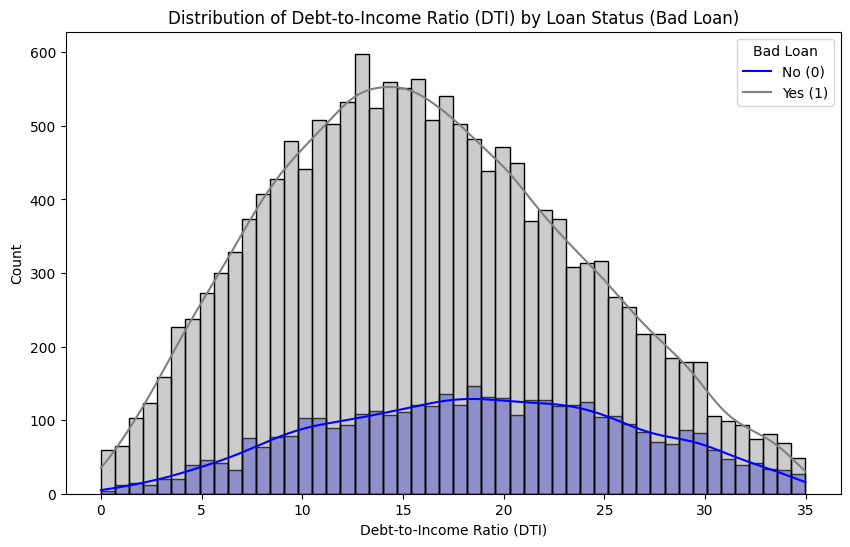

In [3110]:
# Criar um histograma para a variável DTI (Rácio Dívida/Rendimento) segmentado por estado do empréstimo
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="dti", hue="bad_loan", bins=50, alpha=0.4, kde=True, palette={0: "grey", 1: "blue"})  

# Adicionar rótulos e título
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.ylabel("Count")
plt.title("Distribution of Debt-to-Income Ratio (DTI) by Loan Status (Bad Loan)")
plt.legend(title="Bad Loan", labels=["No (0)", "Yes (1)"])

# Exibir o gráfico
plt.show()


O gráfico apresenta a distribuição do Rácio Dívida/Rendimento (DTI) dos empréstimos, diferenciando entre aqueles que cumpriram os pagamentos dos seus empréstimos e aqueles que entraram em incumprimento. Observa-se que a maioria dos clientes tem um DTI relativamente baixo, com a distribuição concentrada nos valores menores e uma cauda que se estende para valores mais elevados.
A distribuição dos clientes que não entraram em incumprimento (bad_loan = 0) e dos que incumpriram (bad_loan = 1) apresenta um padrão semelhante, sugerindo que ambos os grupos possuem uma ampla variação nos valores de DTI. No entanto, é possível verificar que os clientes em incumprimento têm uma maior concentração em faixas mais elevadas de DTI, o que faz sentido, pois um rácio dívida/rendimento mais alto significa que uma maior percentagem do rendimento está comprometida, reduzindo a capacidade de lidar com obrigações.

### EXERCISE 2.5 (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  


---

Este código gera um gráfico de setores (pie chart) para visualizar a proporção das diferentes categorias na variável term, que representa a duração dos empréstimos.
O objetivo desta visualização é identificar e evidenciar um problema de formatação na classificação "36 meses", garantindo que os valores estão corretamente estruturados para análise

In [3111]:
# Contar as ocorrências de cada categoria na variável 'term'
term_counts = data['term'].value_counts().reset_index()
term_counts.columns = ['term', 'count']

# Criar gráfico piechar plotty
fig = px.pie(
    term_counts,
    names='term',
    values='count',
    title='Proporção de Term no Dataset',
    labels={'term': 'Term'},
    hole=0.3  # Define um donut chart (opcional)
)

# Exibir gráfico
fig.show()

O gráfico representa a proporção da variável "term" no conjunto de dados, indicando a distribuição dos prazos dos empréstimos concedidos. No gráfico, observamos três categorias distintas:

"36 months" (36 meses) - Representa a maior fatia do gráfico, ocupando aproximadamente 74,8% do total. Isso significa que a maioria dos empréstimos no dataset tem um prazo de pagamento de 36 meses.

"60 months" (60 meses) - Corresponde a 25% do total, indicando que um número significativo de empréstimos também é concedido para um prazo de 60 meses, embora seja menor em relação ao primeiro grupo.

"36 Months" (com "M" maiúsculo) - Esta categoria aparece separadamente com uma proporção muito pequena, cerca de 0,16%. **Trata-se de um erro de formatação nos dados, onde "36 months" e "36 Months" foram interpretados como categorias distintas.**

# Exercise 3

---

**descriptive statistics id**

 A variavel `id` é uma variavel categorica que identifica o pedido de empréstimo, ou seja, serve como identificador unico, portanto em termos de estatisticas tradicionais, não existe muito a analisar, além de verificar se a mesma é é constituida por valores distintos e não existe valore nulos. Apesar do seu aspecto ser um numero não tem significado matemático.

In [3112]:
# Verificação se todos os valores são distintos
data["id"].nunique() == len(data)

True

**descriptive statistics annual inc**

 A variavel `annual_inc` é uma variavel numérica, olhando para o histograma da distribuição, podemos verificar  uma forte assimetria à direita, indicando que a maioria dos clientes tem rendimentos relativamente baixos ou médios, enquanto um número reduzido de clientes possui rendimentos muito elevados. 
 A existência de uma cauda longa à direita sugere a presença de outliers, ou seja, clientes com rendimentos muito acima da média.


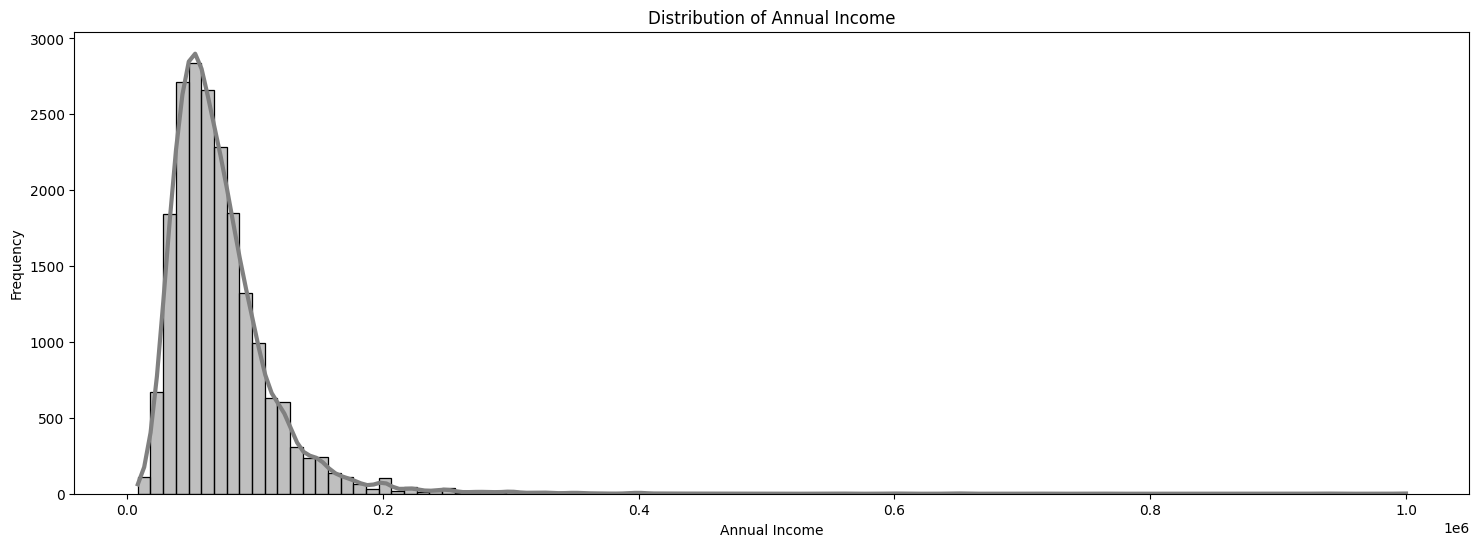

In [3113]:
# Criar um histograma para a distribuição do rendimento anual (annual_inc)
plt.figure(figsize=(18, 6))
sns.histplot(data, x="annual_inc", bins=100, kde=True,line_kws={'lw': 3},color='grey')

# Adicionar rótulos e título
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")

# Exibir o gráfico
plt.show()

In [3114]:
#Carlcular média Rendimento Anual
print(f'Average Annual Income: {data.annual_inc.mean()}')

#Carlcular Mediana Rendimento Anual
print(f'Median Depth of Diamonds is: {data.annual_inc.median()}')

Average Annual Income: 73349.57835
Median Depth of Diamonds is: 65000.0


In [3115]:
#Calcular Desvio Padrão  Rendimento Anual
print(f'Standard Deviation of Annual Income: {data.annual_inc.std()}')


Standard Deviation of Annual Income: 45198.567254725625


In [3116]:
#Calcular Min e Max dos Rendimento Anual
print(f'Min Annual Income: {data.annual_inc.min()}')
print(f'Max Annual Income: {data.annual_inc.max()}')

Min Annual Income: 8412.0
Max Annual Income: 1000000.0


In [3117]:
# Calcular os quantis 0.25 e 0.75 para Rendimento Anual
quantile_25 = data['annual_inc'].quantile(0.25)
quantile_75 = data['annual_inc'].quantile(0.75)

print(f"Quantile 0.25 of Annual Income: {quantile_25}")
print(f"Quantile 0.75 of Annual Income: {quantile_75}")


Quantile 0.25 of Annual Income: 47000.0
Quantile 0.75 of Annual Income: 88000.0


In [3118]:
#Calculate Skewness Rendimento Anual
print(f'Skewness of Annual Income is: {scipy.stats.skew(data.annual_inc)}')

Skewness of Annual Income is: 5.275648123592321


In [3119]:
#Calculate Kurtosis Rendimento Anual
print(f'Kurtosis of Annual Income is: {scipy.stats.kurtosis(data.annual_inc)}')

Kurtosis of Annual Income is: 66.72665803201564


A distribuição do rendimento anual apresenta uma forte assimetria à direita, caracterizada por uma média de 73,349.58 e uma mediana inferior, de 65,000.00, o que indica que existem valores elevados que puxam a média para cima. A maioria dos rendimentos concentra-se abaixo da média, sugerindo que a distribuição não é simétrica.

A variabilidade dos rendimentos é elevada, com um desvio padrão de 45198.57, mostrando que os valores estão bastante dispersos em relação à média. O intervalo entre os 25% e os 75% mais centrais situa-se entre 47,000.00 e 88,000.00, indicando que metade da população ganha dentro desta faixa. No entanto, há valores extremos, uma vez que o rendimento mínimo é 8,412.00, enquanto o máximo atinge 1000000, sugerindo a presença de outliers.

Olhando para o valor obtido em Skewness, confirma-se assimetria positiva (5.28) reforçando a distribuição é fortemente inclinada para a direita, ou seja, significa que a maior parte dos indivíduos tem rendimentos mais baixos, mas existem alguns com rendimentos muito elevados que estendem a cauda da distribuição. Além disso, o valor obtido em Kurtosis  extremamente elevada (66.73) indica que a distribuição é muito mais pontiaguda do que uma distribuição normal, significando que há uma alta concentração de valores próximos da mediana e uma cauda longa com valores extremos muito distantes.

**descriptive statistics grade**

A variável `grade` é uma variável categórica ordinal, onde as classificações de A a G representam diferentes níveis de risco associados à taxa de incumprimento do empréstimo. Quanto melhor a classificação (A), menor é o risco, enquanto classificações mais baixas (G) indicam um maior risco de incumprimento.

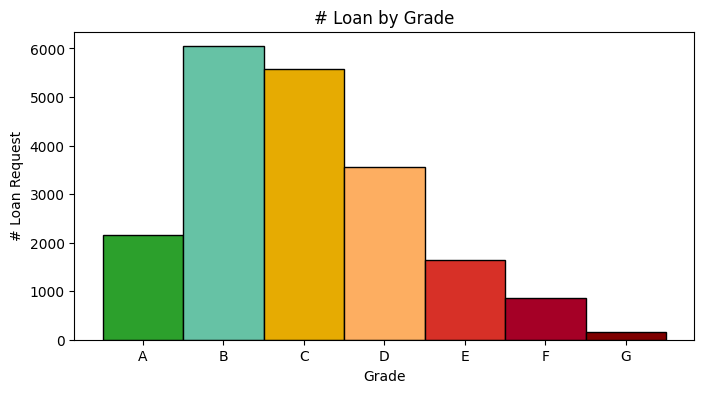

In [3120]:
# Garantir que a variável "grade" é categórica e ordenada
data["grade"] = pd.Categorical(data["grade"], categories=grades_ordered, ordered=True)

# Criar o histograma 
plt.figure(figsize=(8, 4))

# Criar barras manualmente para garantir cores s
ax = sns.histplot(data=data, x="grade", discrete=True)

# Aplicar cores manualmente a cada barra
for patch, grade in zip(ax.patches, grades_ordered):
    patch.set_facecolor(grade_colors[grade])

# Adicionar títulos e rótulos
plt.title("# Loan by Grade")
plt.xlabel("Grade")
plt.ylabel("# Loan Request")

# Exibir o gráfico
plt.show()


Em termos de medida centrais

In [3121]:
#Use the mode to identify the most common category
print(f'The most common type of Grade is: {data.grade.mode()[0]}')

The most common type of Grade is: B


Em termos de medida de dispersão

In [3122]:
#Get the number of unique categories
print(f'The number of unique categories is: {data.grade.nunique()}')

The number of unique categories is: 7


In [3123]:
#Get the names of the unique categories in the form of a list
print(f'The names of categories are : {data.grade.unique().tolist()}')

The names of categories are : ['A', 'D', 'E', 'B', 'G', 'C', 'F']


In [3124]:
#What is the frequency of the various categories?
print(f'The volume of examples in each category are: \n\n{data.grade.value_counts()}')

The volume of examples in each category are: 

grade
B    6042
C    5566
D    3554
A    2159
E    1645
F     865
G     169
Name: count, dtype: int64


In [3125]:
#Print the percentage of values in each grade
print(f'The percentage of values in each grade are: \n\n{data.grade.value_counts(normalize=True)*100}')


The percentage of values in each grade are: 

grade
B    30.210
C    27.830
D    17.770
A    10.795
E     8.225
F     4.325
G     0.845
Name: proportion, dtype: float64


Existem 7 categorias únicas na variavel `grade`: (A, B, C, D, E, F e G), sendo a categoria mais comum a (B). A distribuição dos exemplos por categoria demonstra que mais de metade dos emprestimos se encontra nas classificações  (B e C), enquanto as categorias de maior risco (F e G) representam uma menor percentagem do total.

Em termos de frequência relativa (% do total), verifica-se que:
B e C representam mais de metade dos exemplos do dataset (cerca de 58%), o que sugere que a maioria dos empréstimos tem um risco de crédito moderado. As classes de menor risco (A) representam cerca de 10.8% do total, indicando que apenas uma pequena parte dos empréstimos tem uma classificação muito favorável.
As classes de maior risco (F e G) representam apenas cerca de 5.2%, o que sugere que empréstimos concedidos a clientes de risco elevado são menos comuns. Esta distribuição pode ser explicada por critérios de avaliação de risco utilizados na concessão de crédito, onde clientes com classificações mais baixas podem ter um menor acesso a empréstimos.

# Exercise 4

---

### EXERCISE 4.1

---

In [3126]:
#Selecionar as variáveis numéricas, excluir identificador do empréstimo
numeric_df = data.select_dtypes(include=['number'])
numeric_df.drop(columns=['id'], inplace=True)


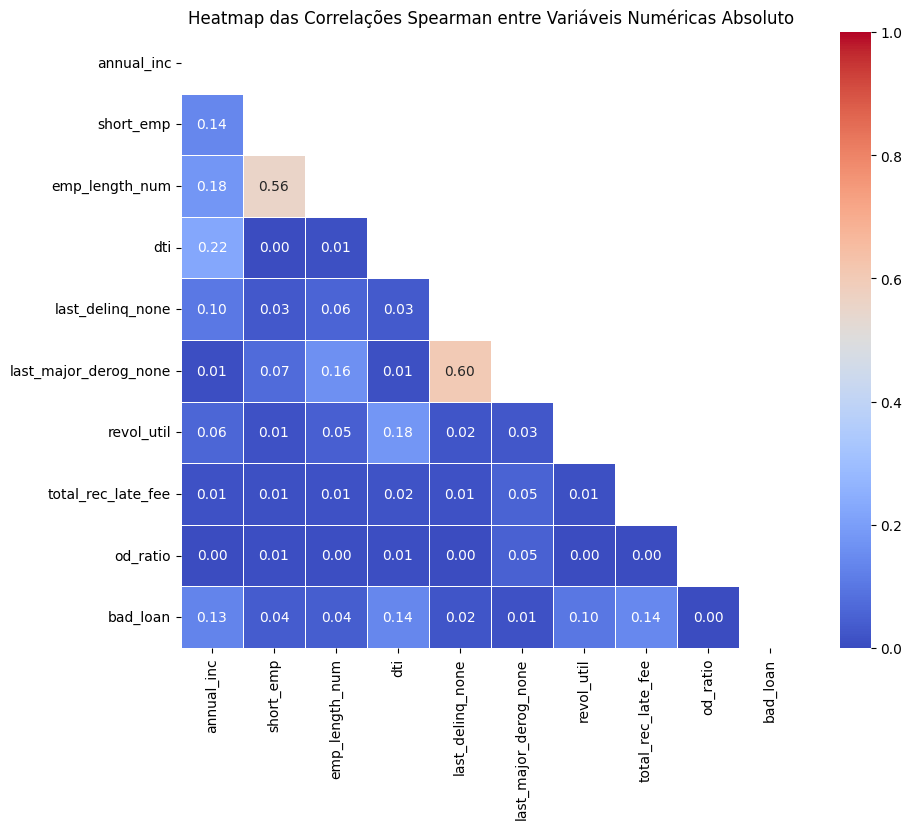

In [3127]:
#Calcular correlação Spearman
corr_spearman = numeric_df.corr(method='spearman',numeric_only=True)

#Colocar em Valores Absolutos
corr_spearman  = corr_spearman .abs()

# Criar um heatmap Spearman das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_spearman))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,mask=mask,vmin=0,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Spearman entre Variáveis Numéricas Absoluto", color="black")

# Exibir o gráfico
plt.show()



In [3128]:
print(f"Corr last_delinq_none, last_major_derog_none - {calc_correlation(data, 'last_delinq_none', 'last_major_derog_none')}")
print(f"Corr emp_length_num, short_emp - {calc_correlation(data, 'emp_length_num', 'short_emp')}")

Corr last_delinq_none, last_major_derog_none - {'pearson_corr': np.float64(0.6032673979655274), 'pearson_p_value': np.float64(3.494069707607259e-58), 'spearman_corr': np.float64(0.6032673979655275), 'spearman_p_value': np.float64(3.494069707606952e-58)}
Corr emp_length_num, short_emp - {'pearson_corr': np.float64(-0.5825795873471269), 'pearson_p_value': np.float64(0.0), 'spearman_corr': np.float64(-0.5579248072588023), 'spearman_p_value': np.float64(0.0)}


Olhando para os valores de correlação de Spearman, podemos identificar que a relação mais forte entre variáveis numéricas ocorre entre “last_major_derog_none” e “last_delinqu_none”, com um coeficiente de correlação de 0.60. O p-value associado a esta correlação é 3,49 × 10⁻⁵⁸, um valor extremamente pequeno, indicando que esta correlação é altamente significativa do ponto de vista estatístico.
A segunda relação mais forte observa-se entre “emp_length_num” e “short_emp”, com uma correlação de 0.56. Este valor indica que a duração da experiência profissional de um indivíduo está moderadamente associada ao facto de ter um histórico de emprego curto, o que faz sentido, pois uma maior experiência tende a corresponder a um menor número de empregos curtos.
Para esta segunda correlação, o p-value é 0,0, o que significa que a relação é estatisticamente muito significativa, reforçando a ideia de que existe uma ligação consistente entre estas duas variáveis. 

### EXERCISE 4.2

---

In [3129]:
print("column                  pearson-corr  pval")
numeric_df_clean = numeric_df.dropna()
for col in numeric_df_clean.columns:
    corr, pval = scipy.stats.pearsonr(numeric_df_clean[col], numeric_df_clean.bad_loan)    
    print(f"{col: <22}  {corr: >5.2f}         {pval:4.2f}")

column                  pearson-corr  pval
annual_inc              -0.13         0.00
short_emp               -0.01         0.77
emp_length_num          -0.03         0.46
dti                      0.22         0.00
last_delinq_none         0.01         0.73
last_major_derog_none   -0.00         0.94
revol_util               0.16         0.00
total_rec_late_fee       0.14         0.00
od_ratio                -0.06         0.18
bad_loan                 1.00         0.00


A análise da correlação de Pearson entre as diversas variáveis numéricas e a variável bad_loan revelou que variável dti (rácio dívida/rendimento) apresenta a maior correlação, sendo esta uma correlação positiva moderada (r = 0,22), indicando que clientes mais endividados tendem a ter um maior risco de incumprimento. Como o p-value é 0,00, esta relação é estatisticamente significativa.

# Exercise 5

---

O código abaixo identifica outliers nas variaveis numéricas do dataset utilizando três métodos diferentes: **IQR (Interquartile Range)**, **2 desvios-padrão da média (±2σ)** e **3 desvios-padrão da média (±3σ)**. A análise é aplicada a todas as colunas numéricas do DataFrame `out_numeric_df`.

 **Método IQR (Interquartile Range)**
- Calcula o primeiro quartil (Q1 - 25%)** e o **terceiro quartil (Q3 - 75%).
- O Intervalo Interquartil (IQR) é calculado como `Q3 - Q1`.
- Define limites para outliers:
  - Limite inferior: `Q1 - 1.5 * IQR`
  - Limite superior: `Q3 + 1.5 * IQR`
- Conta os valores fora desses limites e armazena no dicionário `outlier_counts_iqr`.

**Método de 2 Desvios-Padrão (±2σ)**
- Calcula a média** e o **desvio-padrão da variável.
- Define limites para outliers:
  - Limite inferior: `média - 2 * desvio-padrão`
  - Limite superior: `média + 2 * desvio-padrão`
- Conta os valores que estão fora desses limites e armazena no dicionário `outlier_counts_std2`.

**Método de 3 Desvios-Padrão (±3σ)**
- Define limites mais restritivos:
  - Limite inferior: `média - 3 * desvio-padrão`
  - Limite superior: `média + 3 * desvio-padrão`
- Conta os valores que estão fora desses limites e armazena no dicionário `outlier_counts_std3`.

No final é combinado num dataframe a contagens de Outliers de cada um dos métodos acima. 

In [3130]:
# Criar dicionário para armazenar as contagens de outliers para ambos os métodos
outlier_counts_iqr = {}
outlier_counts_std2 = {}
outlier_counts_std3 = {}


# Criar uma cópia do DataFrame numeric_df
out_numeric_df = numeric_df.copy()
out_numeric_df.drop(columns=['bad_loan'], inplace=True)


# Método IQR e Desvio Padrão para deteção de outliers
for col in out_numeric_df.columns:
    # Remover valores nulos antes da análise
    col_data = out_numeric_df[col].dropna()
    
    # Método IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR

    outliers_iqr = col_data[(col_data < lower_bound_iqr) | (col_data > upper_bound_iqr)]
    outlier_counts_iqr[col] = len(outliers_iqr)

    # Método Desvio Padrão (2 desvios-padrão da média)
    mean = col_data.mean()
    std_dev = col_data.std()

    lower_bound_std2 = mean - 2 * std_dev
    upper_bound_std2 = mean + 2 * std_dev

    outliers_std2 = col_data[(col_data < lower_bound_std2) | (col_data > upper_bound_std2)]
    outlier_counts_std2[col] = len(outliers_std2)

    # Método Desvio Padrão (3 desvios-padrão da média)
    lower_bound_std3 = mean - 3 * std_dev
    upper_bound_std3 = mean + 3 * std_dev

    outliers_std3 = col_data[(col_data < lower_bound_std3) | (col_data > upper_bound_std3)]
    outlier_counts_std3[col] = len(outliers_std3)


# Criar DataFrames para visualização
outlier_df_iqr = pd.DataFrame.from_dict(outlier_counts_iqr, orient='index', columns=['Outliers (IQR)'])
outlier_df_std2 = pd.DataFrame.from_dict(outlier_counts_std2, orient='index', columns=['Outliers (2 Std Dev)'])
outlier_df_std3 = pd.DataFrame.from_dict(outlier_counts_std3, orient='index', columns=['Outliers (3 Std Dev)'])

# Concatenar os resultados
outlier_df_combined = pd.concat([outlier_df_iqr, outlier_df_std2,outlier_df_std3], axis=1)

# Exibir os resultados
outlier_df_combined


,Outliers (IQR),Outliers (2 Std Dev),Outliers (3 Std Dev)
annual_inc,926,615,259
short_emp,2250,2250,0
emp_length_num,0,0,0
dti,0,638,0
last_delinq_none,0,0,0
last_major_derog_none,138,0,0
revol_util,2,1,1
total_rec_late_fee,231,227,227
od_ratio,0,0,0


Após verificar o dataframe acima vamos verificar os outliers das variaveis: `annual_inc`,`short_emp`,`dti`, `last_major_derog_none`, `revol_util` e `total_rec_late_fee`

Abaixo foram criadas algumas funções para auxiliar o processo de análise que passo a explicar. 

A função `list_outliers` permite  previsualizar valores de outliers de uma determinada variavel segundo um modelo escolhido.

In [3131]:
# Definir uma função para consultar outliers de uma variável específica
def list_outliers(dataframe,coluna,metodo):
    """
    Esta função recebe um DataFrame e o nome de uma variável numérica e retorna os outliers dessa variável
    usando o método escolhido.
    
    Parâmetros:
    - dataframe: DataFrame pandas contendo os dados
    - coluna: Nome da variável numérica a ser analisada

    Retorno:
    - DataFrame contendo apenas os outliers da variável especificada
    """
    if coluna not in dataframe.columns:
        print(f" A variável '{coluna}' não existe no DataFrame.")
        return None
    
    if metodo == 'iqr': 
        Q1 = dataframe[coluna].quantile(0.25)
        Q3 = dataframe[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif metodo == 'std2':
        lower_bound = dataframe[coluna].mean() - 2 * dataframe[coluna].std()
        upper_bound = dataframe[coluna].mean() + 2 * dataframe[coluna].std()

    elif metodo == 'std3':
        lower_bound = dataframe[coluna].mean() - 3 * dataframe[coluna].std()
        upper_bound = dataframe[coluna].mean() + 3 * dataframe[coluna].std()


    # Filtrar os outliers
    outliers = dataframe[(dataframe[coluna] < lower_bound) | (dataframe[coluna] > upper_bound)]

    if outliers.empty:
        print(f" Nenhum outlier encontrado na variável '{coluna}'.")
        return None
    else:
        print(f"Outliers encontrados na variável '{coluna}':")
        return outliers[[coluna]]



A função `plot_outliers` gera um gráfico histograma com as linhas de corte segundo os três métodos iqe, 2 e 3 devios padrão da média.

In [3132]:
def plot_outliers(dataframe, column, mask_outliers,pbins,vlines):
    """
    This function  generates a histogram with cutoff lines for 2 and 3 standard deviations.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - column: Name of the numerical variable to analyze.
    - nbr_std: Number of standard deviations to define outliers (default: 2).

    Returns:
    - Distribution plot of the variable with highlighted limits.
    """
    if column not in dataframe.columns:
        print(f"The variable '{column}' does not exist in the DataFrame.")
        return None

    # Calculate mean and standard deviation
    mean_value = dataframe[column].mean()
    std_dev = dataframe[column].std()

    # Calculate cutoff values for 2 standard deviations
    min_out_2_std = mean_value - std_dev * 2
    max_out_2_std = mean_value + std_dev * 2

    # Calculate cutoff values for 3 standard deviations
    min_out_3_std = mean_value - std_dev * 3
    max_out_3_std = mean_value + std_dev * 3

   # Calculate cutoff values for iqe
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    min_out_iqr = Q1 - 1.5 * IQR
    max_out_iqr = Q3 + 1.5 * IQR

    if mask_outliers == 'iqr' : 
        min_out = min_out_iqr
        max_out = max_out_iqr
    elif mask_outliers == 'std2':
        min_out = min_out_2_std
        max_out = max_out_2_std
    elif mask_outliers == 'std3':
        min_out = min_out_3_std
        max_out = max_out_3_std

    if mask_outliers != '' :
        dataframe[f'mask_outliers'] = (dataframe[column] < min_out) | (dataframe[column] > max_out)
        #dataframe.query('mask_outliers == False')

    # Create histogram
    plt.figure(figsize=(10, 5))
    if mask_outliers != '' :
        sns.histplot(dataframe.query('mask_outliers == False')[column], bins=pbins, kde=True, color='grey')
    else :
        sns.histplot(dataframe[column], bins=pbins, kde=True, color='grey')
    plt.title(f'Distribution of Variable: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Add vertical lines for thresholds
    if vlines : 
        plt.axvline(x=max_out_2_std, color='red', linestyle='dashed', label='Mean + 2 Std')
        plt.axvline(x=min_out_2_std, color='red', linestyle='dashed')
        plt.axvline(x=max_out_3_std, color='green', linestyle='dashed', label='Mean + 3 Std')
        plt.axvline(x=min_out_3_std, color='green', linestyle='dashed')
        plt.axvline(x=max_out_iqr, color='blue', linestyle='dashed', label='IQR')
        plt.axvline(x=min_out_iqr, color='blue', linestyle='dashed')

    plt.legend()
    plt.show()

A função abaixo, aplica o tratamento aos outlieres segundo metodo de identificação e estratégia. 

In [3133]:
def impute_outliers(df, variable, method='iqr', strategy='median'):
    """
    Substitui outliers de uma variável numérica usando o método IQR ou 2 desvios-padrão e imputação pela mediana ou média.
    
    Parâmetros:
    df (pd.DataFrame): DataFrame contendo a variável a ser processada.
    variable (str): Nome da variável numérica a ser tratada.
    method (str): Método de detecção de outliers ('iqr' ou 'std').
    strategy (str): Método de imputação ('median' ou 'mean').
    
    Retorna:
    pd.DataFrame: DataFrame com os outliers imputados.
    """
    # Criar uma cópia para não modificar o DataFrame original
    df_imputed = df.copy()
    
    if method == 'iqr':
        # Método IQR
        Q1 = df[variable].quantile(0.25)
        Q3 = df[variable].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif method == 'std2':
        # Método de 2 desvios-padrão
        mean = df[variable].mean()
        std_dev = df[variable].std()
        lower_bound = mean - 2 * std_dev
        upper_bound = mean + 2 * std_dev
    elif method == 'std3':
        # Método de 2 desvios-padrão
        mean = df[variable].mean()
        std_dev = df[variable].std()
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
    else:
        raise ValueError("Método inválido. Escolha 'iqr' ou 'std2' ou 'std3'.")
    
 
   # Identificar outliers
    outliers_mask = (df_imputed[variable] < lower_bound) | (df_imputed[variable] > upper_bound)


    # Calcular o valor de substituição (mediana ou média)
    if strategy == 'median':
        replacement_value = df[variable].median()
    elif strategy == 'mean':
        replacement_value = df[variable].mean()
    else:
        raise ValueError("Estratégia inválida. Escolha 'median' ou 'mean'.")
    

      # Aplicar a substituição diretamente nos outliers
    df_imputed.loc[outliers_mask, variable] = replacement_value
    
    
    return df_imputed

Análise Variável `annual_inc`

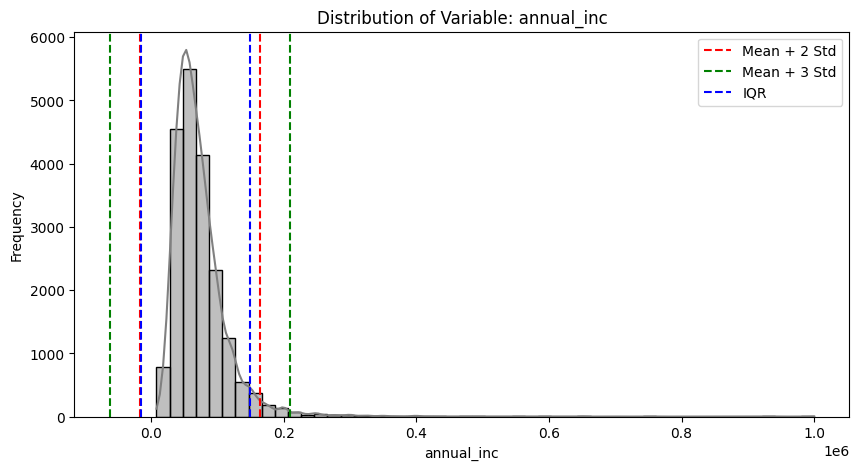

In [3134]:
# Plot Distribuition and bound limits without mask
plot_outliers(data, "annual_inc",mask_outliers='',pbins=50,vlines=True)

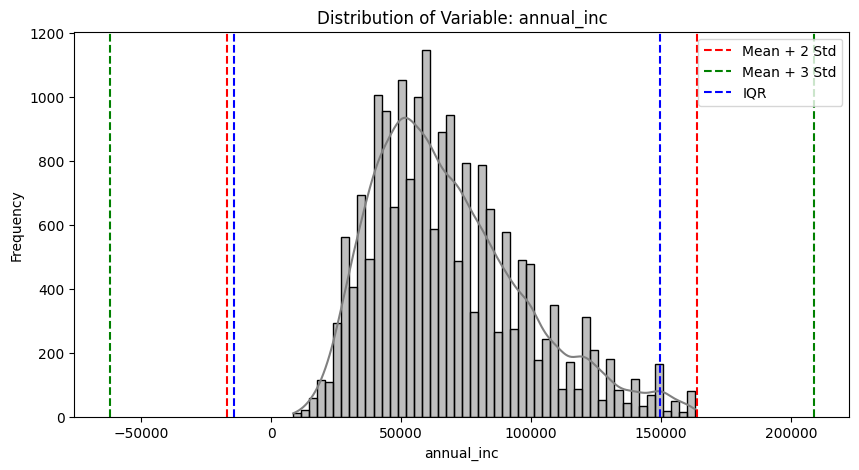

In [3135]:
# Plot Distribuition and bound limits without mask std2
plot_outliers(data, "annual_inc",mask_outliers='std2',pbins=50,vlines=True)

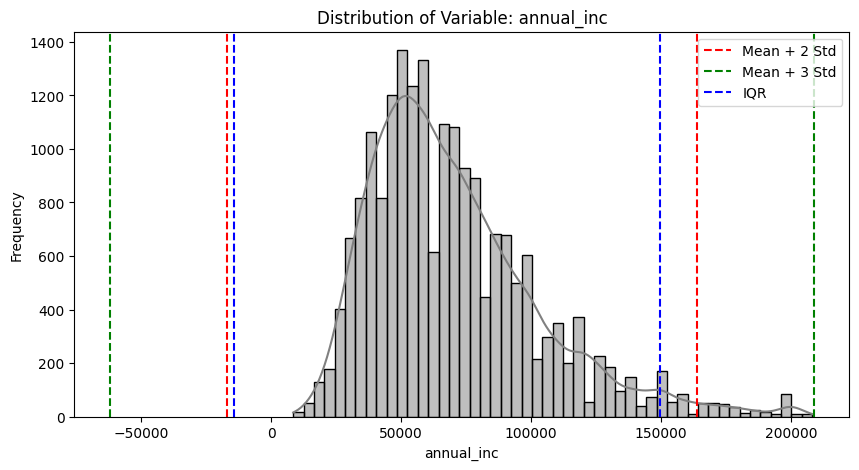

In [3136]:
# Plot Distribuition and bound limits without mask std3
plot_outliers(out_numeric_df, "annual_inc",mask_outliers='std3',pbins=50,vlines=True)

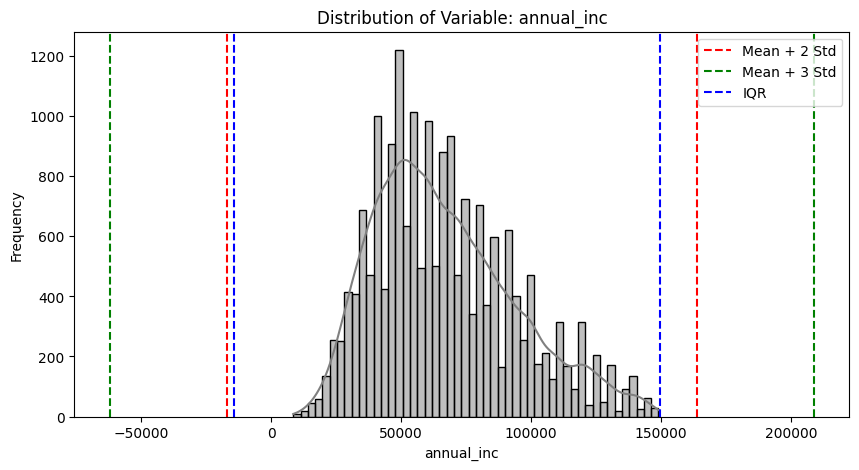

In [3137]:
# Plot Distribuition and bound limits without mask iqr
plot_outliers(out_numeric_df, "annual_inc",mask_outliers='iqr',pbins=50,vlines=True)

No cenário da variavel `annual_inc` tendo em conta a sua assimetria,  o método de identificação dos outliers será através do IQR, imputando depois os valores pela mediana. 

In [3138]:
print(f'Min Annual Income: {data["annual_inc"].min()}')
print(f'Max Annual Income: {data["annual_inc"].max()}')

Min Annual Income: 8412.0
Max Annual Income: 1000000.0


In [3139]:
data = impute_outliers(data, 'annual_inc', method='iqr', strategy='median')

In [3140]:
print(f'New Min Annual Income: {data["annual_inc"].min()}')
print(f'New Max Annual Income: {data["annual_inc"].max()}')

New Min Annual Income: 8412.0
New Max Annual Income: 149000.0


C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_23236\2395197709.py:69: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



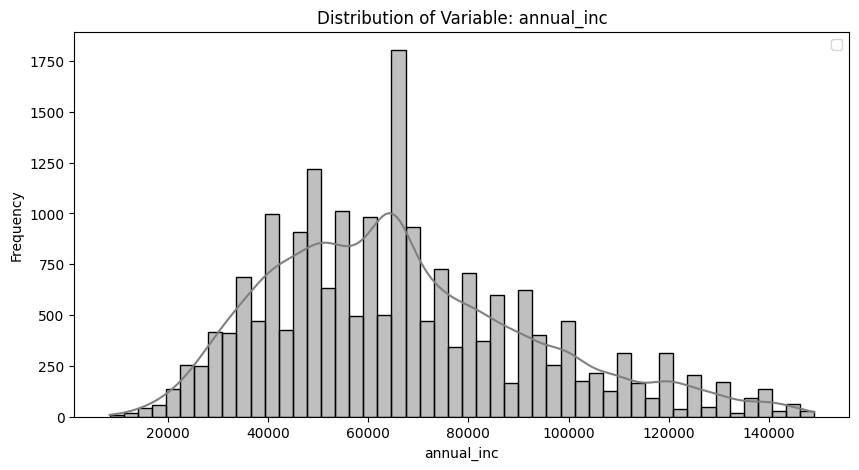

In [3141]:
# Plot Distribuition and bound limits without mask after imputation
plot_outliers(data, "annual_inc",mask_outliers='',pbins=50,vlines=False)

Análise Variável `dti`

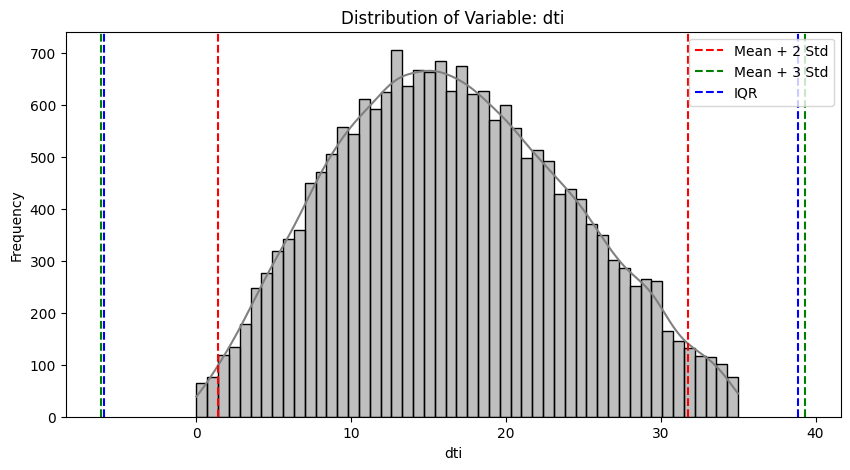

In [3142]:
# Plot Distribuition and bound limits without mask
plot_outliers(out_numeric_df,"dti",mask_outliers='',pbins=50,vlines=True)

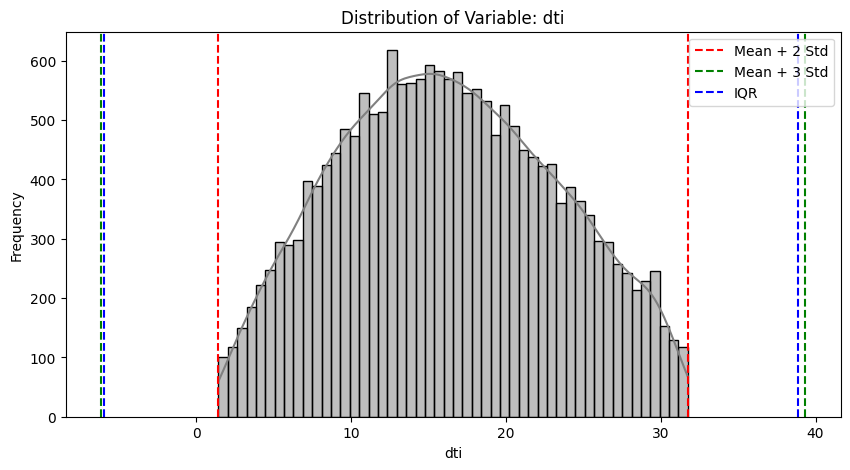

In [3143]:
# Plot Distribuition and bound limits with mask std2
plot_outliers(out_numeric_df,"dti",mask_outliers='std2',pbins=50,vlines=True)

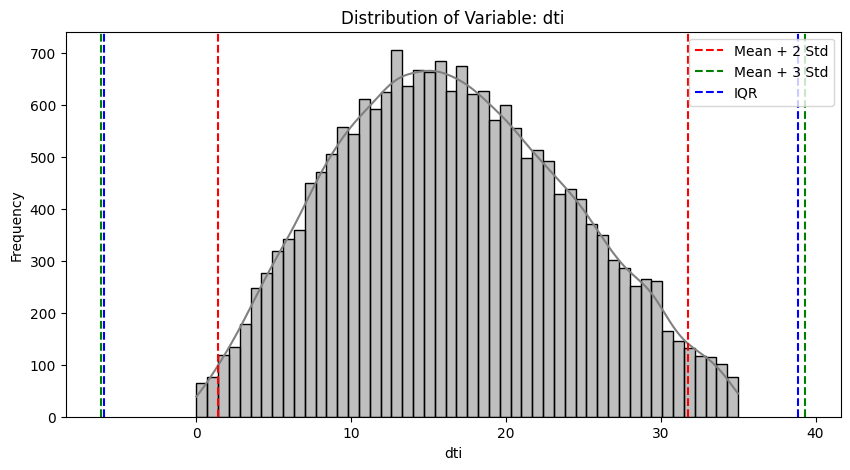

In [3144]:
# Plot Distribuition and bound limits without mask std3
plot_outliers(out_numeric_df, "dti",mask_outliers='std3',pbins=50,vlines=True)

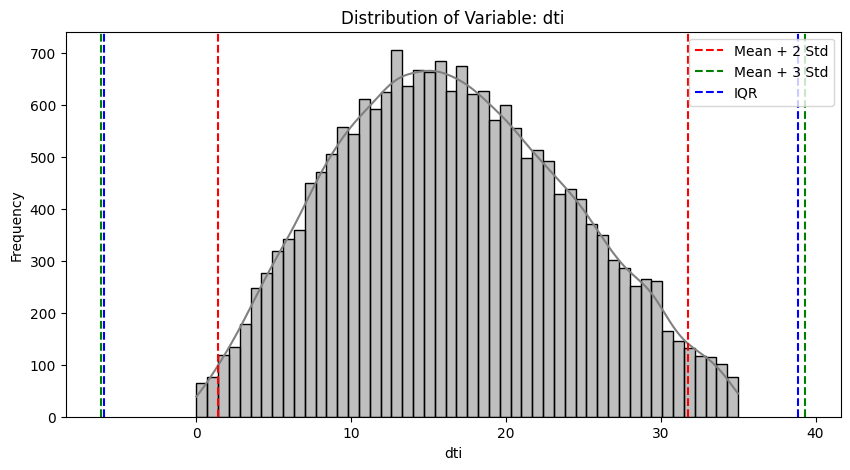

In [3145]:
# Plot Distribuition and bound limits without mask iqr
plot_outliers(out_numeric_df, "dti",mask_outliers='iqr',pbins=50,vlines=True)

In [3146]:

print(f'Number of nulls in dti: {out_numeric_df["dti"].isnull().sum()}')
out_numeric_df.dropna(subset=["dti"], inplace=True)


Number of nulls in dti: 154


In [3147]:
print(f"Skewness of dti is: {scipy.stats.skew(out_numeric_df['dti'])}")

Skewness of dti is: 0.17400810022936694


In [3148]:
#Calculate Kurtosis Rendimento Anual
print(f'Kurtosis of dti is: {scipy.stats.kurtosis(out_numeric_df['dti'])}')

Kurtosis of dti is: -0.6489538071360954


Com base na análise realizada, foram utilizados três métodos para a identificação de outliers: 2 desvios padrão da média, 3 desvios padrão da média e o intervalo interquartil (IQR).

Os resultados mostraram que apenas o critério de 2 desvios padrão da média identificou alguns valores como outliers, enquanto os outros dois métodos não os consideraram extremos. Isto indica que esses valores podem não ser verdadeiros outliers, mas sim variações naturais dentro da distribuição dos dados.

Dado que os critérios mais rigorosos (3 desvios padrão da média e IQR) não apontam para a presença de valores extremos, optou-se por não realizar a imputação dos outliers. Esta decisão evita a alteração desnecessária dos dados, preservando a sua distribuição original e garantindo uma análise mais representativa e fidedigna.


Análise Variável `revol_util`

C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_23236\2395197709.py:69: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



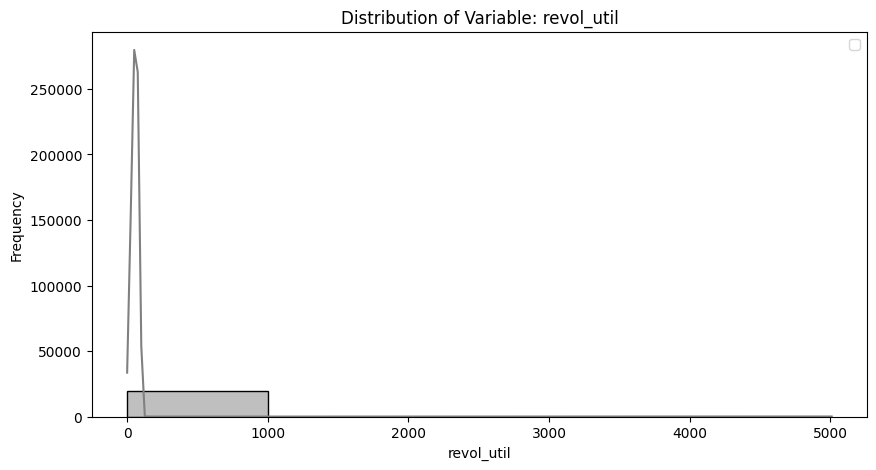

In [3149]:
# Plot Distribuition and bound limits without mask
plot_outliers(out_numeric_df, "revol_util",mask_outliers='',pbins=5,vlines=False)

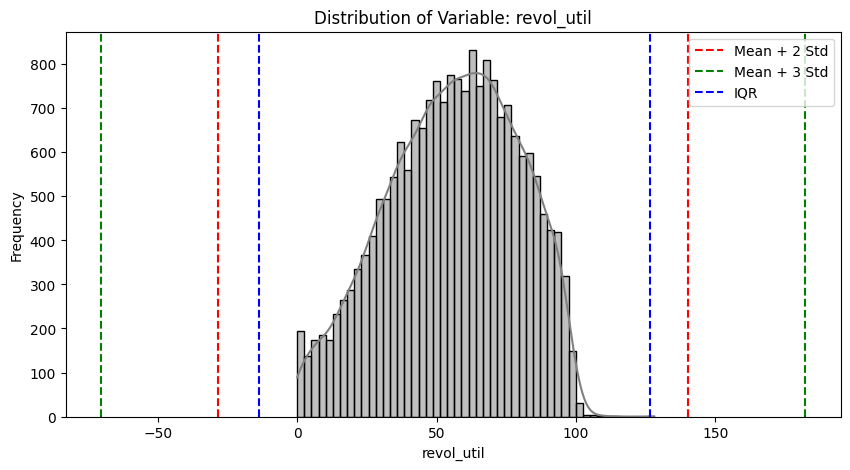

In [3150]:
# Plot Distribuition and bound limits with mask std2
plot_outliers(data, "revol_util",mask_outliers='std2',pbins=50,vlines=True)

In [3151]:
print(f'New Min Annual Income: {data["revol_util"].min()}')
print(f'New Max Annual Income: {data["revol_util"].max()}')

New Min Annual Income: 0.0
New Max Annual Income: 5010.0


A variável "revol_util" (uso de crédito rotativo) apresenta um valor de 5010, que se destaca dos restantes valores, os quais estão representados como uma taxa (0-100).

Após a análise do descritivo da variável, constatei que esta pode ser expressa tanto em percentagem como em montante absoluto, refletindo o valor de crédito utilizado face ao total disponível. Assim, interpreto que este caso corresponde a um erro de escala, resultante da mistura entre taxa percentual e valor monetário.

Dado que não disponho de informação adicional que permita converter o montante em percentagem de forma fiável, optei por eliminar a linha correspondente, garantindo a consistência dos dados na análise.



Excluir  todas as linhas do dataset  com valor da variavel "revol_util" acima de 100 de acordo com raciocinio definido aqui. 

In [3152]:
data = data[data['revol_util'] <= 100]

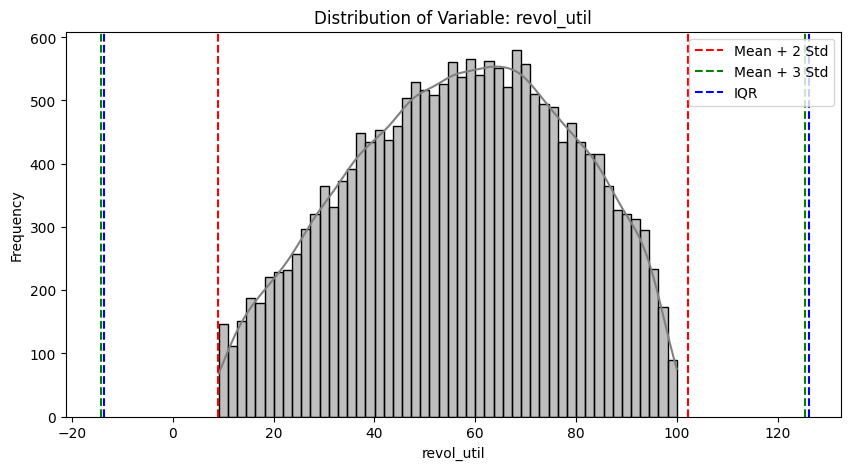

In [3153]:
# Plot Distribuition and bound limits without mask std2
plot_outliers(data, "revol_util",mask_outliers='std2',pbins=50,vlines=True)

Análise Variável `total_rec_late_fee`

C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_23236\2395197709.py:69: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



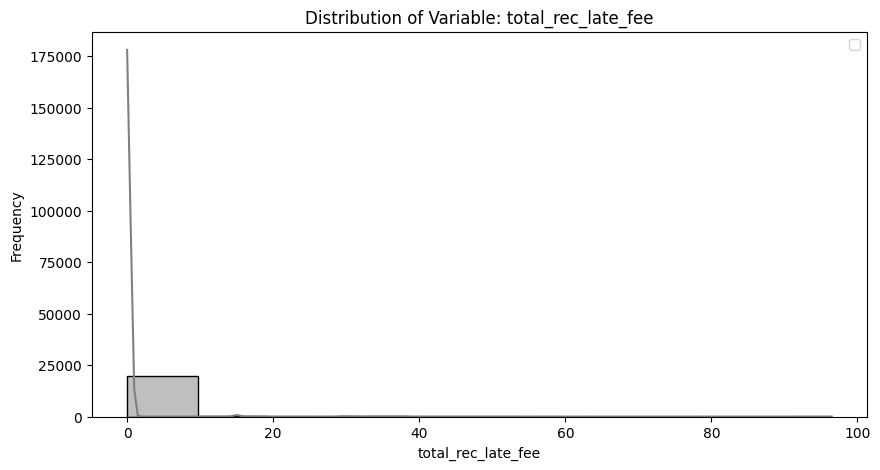

In [3154]:
# Plot Distribuition and bound limits without mask
plot_outliers(data, "total_rec_late_fee",mask_outliers='',pbins=10,vlines=False)

In [3155]:
# Count the occurrences of each unique value in the 'total_rec_late_fee' column
late_fee_counts = data['total_rec_late_fee'].value_counts()
late_fee_percentage = (late_fee_counts / len(data)) * 100
# Display the percentages
print(late_fee_percentage)

total_rec_late_fee
0.0000     98.852590
15.0000     0.285600
30.0000     0.030063
17.4800     0.010021
15.8800     0.010021
             ...    
63.8400     0.005011
29.9167     0.005011
14.9974     0.005011
22.2130     0.005011
52.6500     0.005011
Name: count, Length: 165, dtype: float64


In [3156]:

print(f'Median total_rec_late_fee is: {data["total_rec_late_fee"].median():.2f}')


Median total_rec_late_fee is: 0.00


Imputar um valor binário em vez de taxa, substituir os valores acima de zero por 1. 

In [3157]:
data['received_late_fee'] = np.where(data['total_rec_late_fee'] > 0, 1, 0)

C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_23236\2395197709.py:69: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



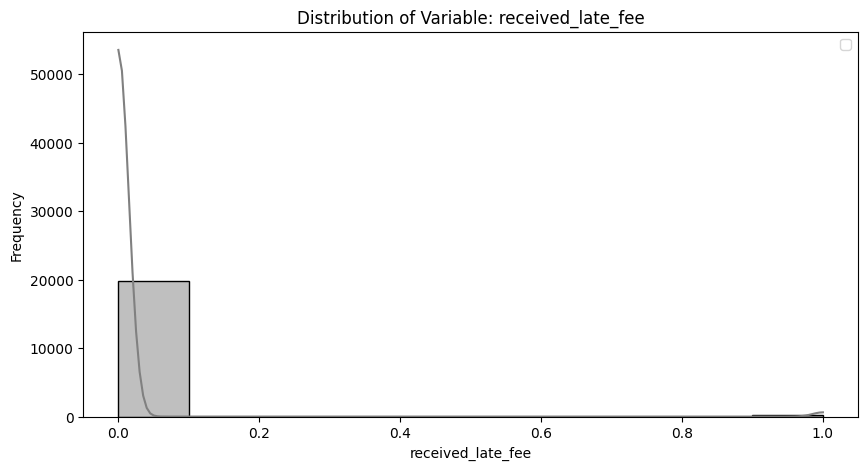

In [3158]:
# Plot Distribuition and bound limits without mask
plot_outliers(data, "received_late_fee",mask_outliers='',pbins=10,vlines=False)

In [3159]:
data.drop(columns=["total_rec_late_fee"], inplace=True)

Dado que a variável total_rec_late_fee apresenta uma distribuição altamente assimétrica, onde 98% dos valores são iguais a zero, optou-se por categorizá-la numa variável binária. Esta abordagem permite distinguir entre os casos em que houve pagamento de taxa de atraso e os casos em que não houve qualquer registo de pagamento.

Ao invés de tratar os valores positivos como uma variável contínua, o que poderia distorcer a análise devido à sua elevada concentração em zero e à presença de alguns valores atípicos elevados, a transformação binária simplifica a interpretação dos dados e facilita análises posteriores. Assim, os valores foram recodificados da seguinte forma:

0 → Para clientes que não pagaram taxa de atraso.
1 → Para clientes que pagaram taxa de atraso, independentemente do montante.

# Exercise 6

---

Abaixo são listados as variaveis com valores nulos, e o seu somatório.

In [3160]:
null_summary = data.isnull().sum()
null_summary = null_summary[null_summary > 0]
null_summary = pd.DataFrame(null_summary, columns=["Explicit Nulls"])
null_summary

,Explicit Nulls
home_ownership,1489
dti,153
last_major_derog_none,19388


In [3161]:
# Listar colunas categ ricas
cat_cols = data.select_dtypes(include=['object']).columns
print(cat_cols)

for col in cat_cols:
    print(f"{col}: {data[col].unique()}")


Index(['home_ownership', 'purpose', 'term'], dtype='object')
home_ownership: ['RENT' 'OWN' 'MORTGAGE' nan]
purpose: ['credit_card' 'debt_consolidation' 'medical' 'other' 'home_improvement'
 'small_business' 'major_purchase' 'vacation' 'car' 'house' 'moving'
 'wedding']
term: [' 36 months' ' 60 months' ' 36 Months']


Analisando a feature `home_ownership`

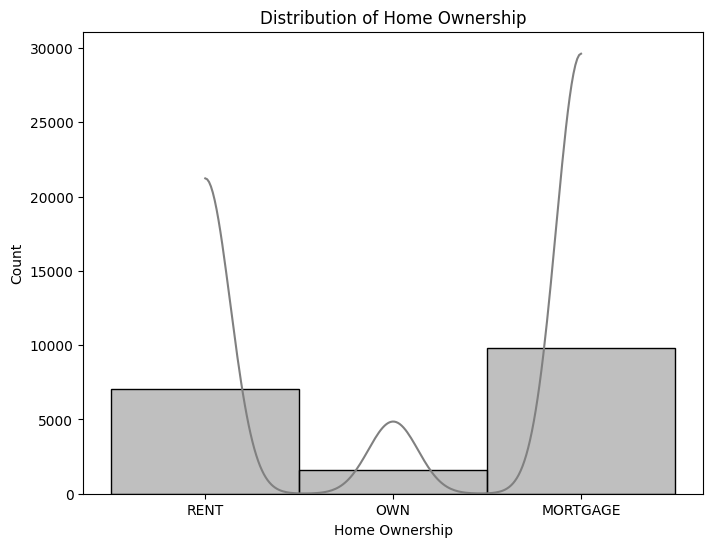

In [3162]:
# Histogram for home_ownership
plt.figure(figsize=(8,6))
sns.histplot(data['home_ownership'], alpha=0.5, kde=True, color='grey')
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Distribution of Home Ownership")
plt.show()



In [3163]:
print("Value Counts for Home Ownership")
print(data['home_ownership'].value_counts())


Value Counts for Home Ownership
home_ownership
MORTGAGE    9820
RENT        7038
OWN         1611
Name: count, dtype: int64


In [3164]:
# Substituir valores nulos em "home_ownership" por "Desconhecido"
data["home_ownership"].fillna("Unknown", inplace=True)

C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_23236\3198917744.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





A substituição dos valores nulos na variável "home_ownership" não foi feita com a moda ("MORTGAGE"), pois a distribuição dos valores não apresenta um claro predomínio absoluto de uma única categoria. Embora "MORTGAGE" seja a categoria mais frequente, "RENT" e "OWN" também possuem representatividade significativa, representando aproximadamente 41.8% e 9.6%, respectivamente, do total de observações.

Dado esse cenário, substituir os valores nulos pela moda poderia introduzir um viés no dataset, atribuindo artificialmente um status de posse de imóvel a registros para os quais essa informação é desconhecida. Em vez disso, foi criada a categoria "Desconhecido", garantindo que a ausência dessa informação não distorça análises futuras, permitindo que seja tratada de forma diferenciada conforme necessário.

Analisando a feature `dti`

A variavel `dti`  (Debt-to-Income Ratio), esta segue aproximadamente uma distribuição normal, conforme indicado pelos valores calculados nos pontos anteriores, nomeadamente a skewness (0.174) e kurtosis (-0.649). Como também os vamores  média (16.59) e a mediana (16.19) estarem bastante próximas, isso sugere uma distribuição simétrica sem grandes assimetrias.

In [3165]:
#  imputação da média 
dti_mean = data["dti"].mean()
data = data.copy()  # Criar uma cópia explícita para evitar o erro de chained assignment
data["dti"] = data["dti"].fillna(dti_mean)

Dado a informação desctia acima, a estratégia escolhida para tratar os valores nulos foi a imputação da média. Essa abordagem é apropriada quando a variável segue uma distribuição normal, pois mantém a tendência central dos dados sem distorcer significativamente a distribuição original. Além disso, evita a introdução de viés sistemático que poderia ocorrer ao escolher valores extremos ou utilizar outros métodos de imputação.

Analisando a variavel `last_major_derog_none` 

In [3166]:
percentagem_nulos = (data['last_major_derog_none'].isnull().sum() / len(data)) * 100
print(f"Percentagem de valores nulos em last_major_derog_none: {percentagem_nulos:.2f}%")

Percentagem de valores nulos em last_major_derog_none: 97.14%


In [3167]:
# Remover a variável "last_major_derog_none" do dataset
data.drop(columns=["last_major_derog_none"], inplace=True)

A variável last_major_derog_none foi removida do conjunto de dados devido à sua elevada percentagem de valores em falta, representando 97% de dados ausentes. A presença de um número tão significativo de valores nulos compromete a utilidade da variável, tornando qualquer tentativa de imputação pouco fiável. Caso os valores fossem preenchidos, haveria um risco considerável de introdução de viés nos dados, podendo afetar negativamente a qualidade da análise.

Além disso, a elevada taxa de valores ausentes indica que a variável pode não ter relevância para a análise, ou que os dados não foram recolhidos de forma consistente. Consequentemente, manter esta variável no conjunto de dados poderia apenas introduzir ruído desnecessário e aumentar a complexidade da análise sem proporcionar benefícios significativos.

Abaixo é feito nova verificação, se o processo de transfrormação aplicado eliminou os valores nulos. 

In [3168]:
null_summary = data.isnull().sum()
null_summary = null_summary[null_summary > 0]
null_summary = pd.DataFrame(null_summary, columns=["Explicit Nulls"])
null_summary

,Explicit Nulls


# Exercise 7

---

Para decidir quais variáveis eliminar, foram analisadas as correlações das variáveis numéricas com a variável alvo (target), em conjunto com o método VarianceThreshold, que permite remover variáveis com uma variância inferior a 0.05. Esta abordagem garante que apenas variáveis relevantes e com impacto significativo na modelação sejam mantidas.

In [3169]:
numeric_df = data.select_dtypes(include=['number'])

Testar correlação de variaveis numericas com target através de pearson

In [3170]:
print("column                  pearson-corr  pval")
numeric_df = numeric_df.dropna()
for col in numeric_df.columns:
    corr, pval = scipy.stats.pearsonr(numeric_df[col], numeric_df.bad_loan)    
    print(f"{col: <22}  {corr: >5.2f}         {pval:4.2f}")

column                  pearson-corr  pval
id                      -0.04         0.00
annual_inc              -0.12         0.00
short_emp                0.04         0.00
emp_length_num          -0.04         0.00
dti                      0.14         0.00
last_delinq_none         0.02         0.00
revol_util               0.10         0.00
od_ratio                 0.00         0.96
bad_loan                 1.00         0.00
received_late_fee        0.14         0.00


Testar correlação de variaveis numericas com target através de spearman

In [3171]:
print("column                  spearman-corr  pval")
numeric_df = numeric_df.dropna()
for col in numeric_df.columns:
    corr, pval = scipy.stats.spearmanr(numeric_df[col], numeric_df.bad_loan)    
    print(f"{col: <22}  {corr: >5.2f}         {pval:4.2f}")

column                  spearman-corr  pval
id                      -0.04         0.00
annual_inc              -0.13         0.00
short_emp                0.04         0.00
emp_length_num          -0.04         0.00
dti                      0.14         0.00
last_delinq_none         0.02         0.00
revol_util               0.10         0.00
od_ratio                 0.00         0.96
bad_loan                 1.00         0.00
received_late_fee        0.14         0.00


In [3172]:
numeric_df.groupby('bad_loan').received_late_fee.describe()

,count,mean,std,min,25%,50%,75%,max
bad_loan,,,,,,,,
0,15974.0,0.003944,0.062679,0.0,0.0,0.0,0.0,1.0
1,3984.0,0.041667,0.199851,0.0,0.0,0.0,0.0,1.0


identificar colunas com variância inferior a 0.5

In [3173]:
# Aplicar VarianceThreshold para identificar colunas com variância inferior a 0.5
vt = VarianceThreshold(0.5)
vt.fit(numeric_df)

# Obter colunas removidas (com variância abaixo de 0.5)
low_variance_mask = ~vt.get_support()
low_variance_columns = numeric_df.columns[low_variance_mask]

# Criar um dataframe com as colunas removidas e suas variâncias
low_variance_values = numeric_df.var()[low_variance_columns]
df_low_variance = pd.DataFrame(low_variance_values, columns=["Variância"])

# Ordenar o DataFrame de variância em ordem ascendente
df_low_variance.sort_values(by="Variância", ascending=True)


,Variância
received_late_fee,0.011343
od_ratio,0.082742
short_emp,0.099916
bad_loan,0.159779
last_delinq_none,0.247850


In [3174]:
data.drop(columns=["last_delinq_none",'short_emp'], inplace=True)

As variáveis numéricas eliminadas foram:

    -last_delinq_none, por ser a variável numérica com menor correlação com a variável target, apresentando um p-value de 0. Além disso, a sua variância está abaixo do limiar definido, tornando-a menos relevante para a análise.

    -short_emp, por ser a segunda variável com menor correlação e também apresentar um p-value de 0. Adicionalmente, a sua variância é inferior ao limiar mínimo estabelecido, justificando a sua remoção.


Não foi considerada a variável id, uma vez que esta não é uma feature relevante para a análise, mas sim um identificador único do dataset.

# Exercise 8

---

Criar um dataframe final numerico, o identificador foi excluido. 

In [3175]:
# Selecionar apenas as variáveis numéricas
numeric_finaldf = data.select_dtypes(include=['number'])
#numeric_finaldf.drop(columns=['id'], inplace=True)
numeric_finaldf.sample(5)

,id,annual_inc,emp_length_num,dti,revol_util,od_ratio,bad_loan,received_late_fee
13666,5135667,58000.0,11,10.84,53.7,0.756254,0,0
6492,7708155,72000.0,8,14.36,90.7,0.675437,0,0
12366,9395045,55000.0,4,6.13,85.6,0.662571,1,0
14345,5779998,70000.0,4,3.38,43.2,0.633621,0,0
2500,11315697,48000.0,11,20.50,61.0,0.354998,0,0


Abaixo foi criado pipeline com pré processamento de imputação de valores nulos pela mediana, normalização de dados através do StandardScaller e redução de dimensionalizade através de pca para 5 componentes. 

In [3176]:
# Definir variáveis independentes (X) e a variável alvo (y)
X = numeric_finaldf.drop(columns=['bad_loan'])  # Remover a variável alvo se existir
y = numeric_finaldf['bad_loan']  # Definir a variável alvo

# Separar os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Criar o pipeline de pré-processamento e PCA
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputação pela mediana
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('pca', PCA(n_components=5))  # Redução para 5 componentes principais
])

# Aplicar fit e transform ao conjunto de treino e teste
X_train_pca = pipeline.fit_transform(X_train)
X_test_pca = pipeline.transform(X_test)

# Converter para DataFrame
pca_columns = [f'PC{i+1}' for i in range(5)]
df_train_pca = pd.DataFrame(X_train_pca, columns=pca_columns)
df_test_pca = pd.DataFrame(X_test_pca, columns=pca_columns)

print(f"Train pca Dataframe shape Lines , features{df_train_pca.shape}")
print(f"Test pca Dataframe shape Lines , features{df_test_pca.shape}")
print("\n")
print("Train pca Dataframe sample")
print(df_train_pca.sample(5))
print("\n")
print("Test pca Dataframe sample")
print(df_test_pca.sample(5))

Train pca Dataframe shape Lines , features(15966, 5)
Test pca Dataframe shape Lines , features(3992, 5)


Train pca Dataframe sample
            PC1       PC2       PC3       PC4       PC5
3880   2.370178 -1.954007 -0.510324  0.618480 -0.740004
7117   0.899569  0.421337 -0.346002  0.776944 -0.275717
14183  0.576990 -0.681005  0.380001 -1.854400 -0.543959
12210 -3.535696 -0.110554 -1.327819  0.712099 -0.367215
9453   0.244463 -0.073216  0.501086 -1.361875 -0.237474


Test pca Dataframe sample
           PC1       PC2       PC3       PC4       PC5
377  -0.246866  0.278390 -0.799383 -1.203076 -0.962604
282  -0.507799 -1.320780  0.166820  1.807681  0.519464
591  -0.028971 -0.487878  0.571892  0.621097  0.599328
3381 -0.217835  1.394479 -0.509614  0.365813 -0.306674
1014  0.064264  0.938790  0.704277 -2.008539 -0.258383


Após a aplicação do pipeline de transformação, os dados passaram a estar representados por cinco componentes principais resultantes da Análise de Componentes Principais (PCA). Esta transformação permitiu condensar a informação original, à partida mantendo uma grande parte da variabilidade dos dados, ao mesmo tempo que reduziu a dimensionalidade do conjunto de dados. Isto pode ser confirmando calculando a proporção de variância explciada por cada componente principal.  
Observando o output, verifica-se que as novas variáveis PC1 a PC5 já não correspondem diretamente às variáveis originais, mas sim a combinações lineares das mesmas. 
O efeito de normalização aplicado transformou os valores dados onde passaram a ficar distribuidos em torno de zero. 
Como existe uma redução de variaveis,  pode haver alguma perda de informação relativamente às variáveis originais, o que pode influenciar o desempenho do modelo preditivo. No entanto, este compromisso entre redução de dimensionalidade e preservação da variabilidade pode contribuir para um modelo mais eficiente e generalizável, evitando sobreajuste.

# Exercise 9

---

Abaixo foi criado um pipeline que mantém os passos de pré-processamento definidos anteriormente, adicionando um transformador personalizado para enriquecer o dataset. Neste caso, foi incluída a possibilidade de processar uma variável categórica, garantindo que seja devidamente tratada e estruturada para poder ser interpretada por um modelo preditivo.

In [3177]:
# Criar um transformador personalizado para One-Hot Encoding apenas em uma variável categórica
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

    def fit(self, X, y=None):
        self.encoder.fit(X[[self.column]])
        return self

    def transform(self, X):
        encoded_values = self.encoder.transform(X[[self.column]])
        encoded_df = pd.DataFrame(encoded_values, columns=self.encoder.get_feature_names_out([self.column]))
        return encoded_df



#Juntar a coluna categorica ao datafame numerico anterior 
categorical_column = 'home_ownership'
final_df = numeric_finaldf.copy()
final_df[categorical_column] = data[categorical_column]

# Definir as colunas para transformar
numeric_features = numeric_finaldf.select_dtypes(include=['number']).columns.tolist()
categorical_features = [categorical_column]


# Criar o pipeline para variáveis numéricas
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputação pela mediana
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('pca', PCA(n_components=5))  # Redução para 5 componentes principais
])

# Criar o pipeline para a variável categórica
categorical_pipeline = Pipeline([
    ('one_hot_encoder', CustomOneHotEncoder(column=categorical_column))
])


# Criar um ColumnTransformer para aplicar transformações diferentes em numéricas e categóricas
full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),  # Aplicar pipeline numérico
    ('cat', categorical_pipeline, categorical_features)  # Aplicar One-Hot Encoding na variável categórica
])

# Aplicar o pipeline ao dataset
final_df_transformed = full_pipeline.fit_transform(final_df)


# Converter para DataFrame
pca_columns = [f'PC{i+1}' for i in range(5)]
categorical_columns = full_pipeline.named_transformers_['cat'].transform(final_df).columns
final_columns = pca_columns + categorical_columns.tolist()
df_cat_num_transformed = pd.DataFrame(final_df_transformed, columns=final_columns)

print(df_cat_num_transformed.sample(3))


            PC1       PC2       PC3       PC4       PC5  \
7943  -0.164998  1.003105 -0.378304 -0.981239  0.722108   
8882  -1.403051  0.871287  0.319121 -0.161523  0.375954   
13358  1.684272  0.583002  0.643543  0.853237 -1.788556   

       home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
7943                       0.0                 0.0                  0.0   
8882                       1.0                 0.0                  0.0   
13358                      0.0                 0.0                  1.0   

       home_ownership_Unknown  
7943                      1.0  
8882                      0.0  
13358                     0.0  


No processo implementado, o objetivo foi adicionar mais informação ao dataset finalizado anteriormente, aplicando um transformador personalizado que permitisse realizar One-Hot Encoding numa variável categórica específica.

Inicialmente, o dataset continha apenas variáveis numéricas, já transformadas através de imputação por mediana, normalização e redução de dimensionalidade com PCA. No entanto, para enriquecer a informação disponível, foi introduzida uma variável categórica – "home_ownership" – que necessitava de ser corretamente codificada para poder ser integrada no modelo.

Para tal, foi desenvolvido um transformador personalizado (CustomOneHotEncoder), responsável por aplicar One-Hot Encoding apenas à variável categórica selecionada. Este transformador converte os valores categóricos em múltiplas colunas binárias, permitindo que a informação da variável categórica seja representada de forma adequada sem comprometer a estrutura do pipeline.

De forma a garantir que o pré-processamento fosse aplicado corretamente a todos os tipos de variáveis, foi utilizado um ColumnTransformer, que separou o tratamento das variáveis numéricas e categóricas. Assim, o pipeline foi estruturado da seguinte forma:

Para as variáveis numéricas: Todos os passos definidos no pipeline anterior. 
Para a variável categórica: Aplicação do transformador CustomOneHotEncoder, que converte os valores categóricos em variáveis binárias.

Integração de ambos os processamentos num único pipeline, permitindo que as transformações numéricas e categóricas fossem aplicadas simultaneamente ao dataset.

Por fim, o dataset transformado foi reconstruído, combinando as 5 componentes principais do PCA com as novas colunas criadas pelo One-Hot Encoding. 

---

### Cross Validation Model Training And Evaluation

---

In [3178]:
# Separar os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Criar o modelo preditivo (Regressão Logística)
model = LogisticRegression()

# Criar  pipelines com step preditivo baseado em pipeline de transformação
pipeline_numeric_pred = Pipeline([
    ('num_processing', numeric_pipeline),  # Aplicar pré-processamento numérico
    ('model', model)  # Modelo de regressão logística
])

#  **Cross-Validation para o Pipeline A*
performance = cross_val_score(
    pipeline_numeric_pred, X_train, y_train, cv=3, scoring='roc_auc'
)

print(performance)



[0.66170283 0.66180649 0.64823824]


A validação cruzada do modelo utilizando AUC ROC valores com uma média aproximada de 0.65. Estes valores indicam que o modelo tem alguma capacidade de distinguir empréstimos que entram em incumprimento (bad_loan = 1) dos que não entram (bad_loan = 0).

Em termos de interpretação, a AUC ROC varia entre 0 e 1, sendo que,  valores entre 0.6 e 0.7 são considerados aceitáveis, mas indicam um desempenho ainda moderado.


---